## Sanju Mathew - Project on Featurization, Model Selection & Tuning

### Objective
* Modeling of strength of high performance concrete using Machine Learning.

### Deliverable 1: Exploratory data quality report

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", color_codes=True)
sns.set_palette("Set1")
%matplotlib inline

In [2]:
df = pd.read_csv('concrete.csv')
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [3]:
df.shape

(1030, 9)

#### Univariate analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


_Attribute Information_
* Cement : measured in kg in a m3 mixture
* Blast : measured in kg in a m3 mixture
* Fly ash : measured in kg in a m3 mixture
* Water : measured in kg in a m3 mixture
* Superplasticizer : measured in kg in a m3 mixture
* Coarse Aggregate : measured in kg in a m3 mixture
* Fine Aggregate : measured in kg in a m3 mixture
* Age : day (1~365)
* Concrete compressive strength measured in MPa

In [5]:
df.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

* Slag has heavy right skew due to the presence of 45.7% zeros. In fact it looks bimodal with mean of 73.9 & median of 22.
* Ash also has similar distribution to Slag with mean of 54 and median of 0 and 55% zeros.
* Superplasticizer has 36.8% zeros
* Age has a long tail with most of the values between 0 and 100 while its right tail extends till 365.

Exploring if 0 is MAR (Missing At Random) 
 --------------------
slag 45.7 %
ash 55.0 %
superplastic 36.8 %
slag & ash 22.5 %
slag & superplastic 20.9 %
ash & superplastic 36.2 %
slag, ash & superplastic 20.3 %


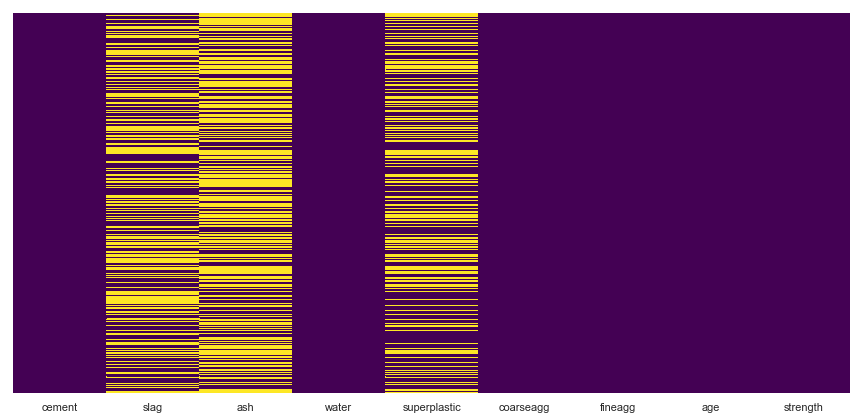

In [6]:
print('Exploring if 0 is MAR (Missing At Random) \n', '-'*20)
for col in df.columns:
    if (df[df[col] == 0][col].count()) != 0:
        print(col, round((df[df[col] == 0][col].count()/df.shape[0])*100,1),"%")
plt.figure(figsize=(15, 7))
sns.heatmap(df.replace(0, np.nan).isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
print('slag & ash', round((df[(df['slag'] == 0) & (df['ash'] == 0)]['ash'].count()/df.shape[0])*100,1),"%")
print('slag & superplastic', round((df[(df['slag'] == 0) & (df['superplastic'] == 0)]['superplastic'].count()/df.shape[0])*100,1),"%")
print('ash & superplastic', round((df[(df['ash'] == 0) & (df['superplastic'] == 0)]['ash'].count()/df.shape[0])*100,1),"%")
print('slag, ash & superplastic', round((df[(df['slag'] == 0) & (df['ash'] == 0) & (df['superplastic'] == 0)]['ash'].count()/df.shape[0])*100,1),"%")

* Data does not have any NaN values
* Exploring if 0 is a missing value

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

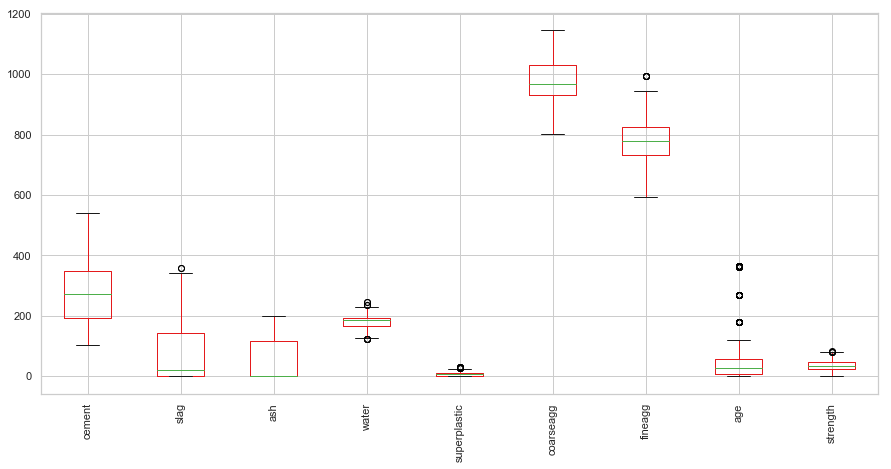

In [7]:
df.plot(kind='box', figsize=(15,7))
plt.xticks(rotation=90)

* Data has few outliers in Slag, Water, Fine Aggregate, Superplasticizer, Age and Strength

#### Multivariate analysis

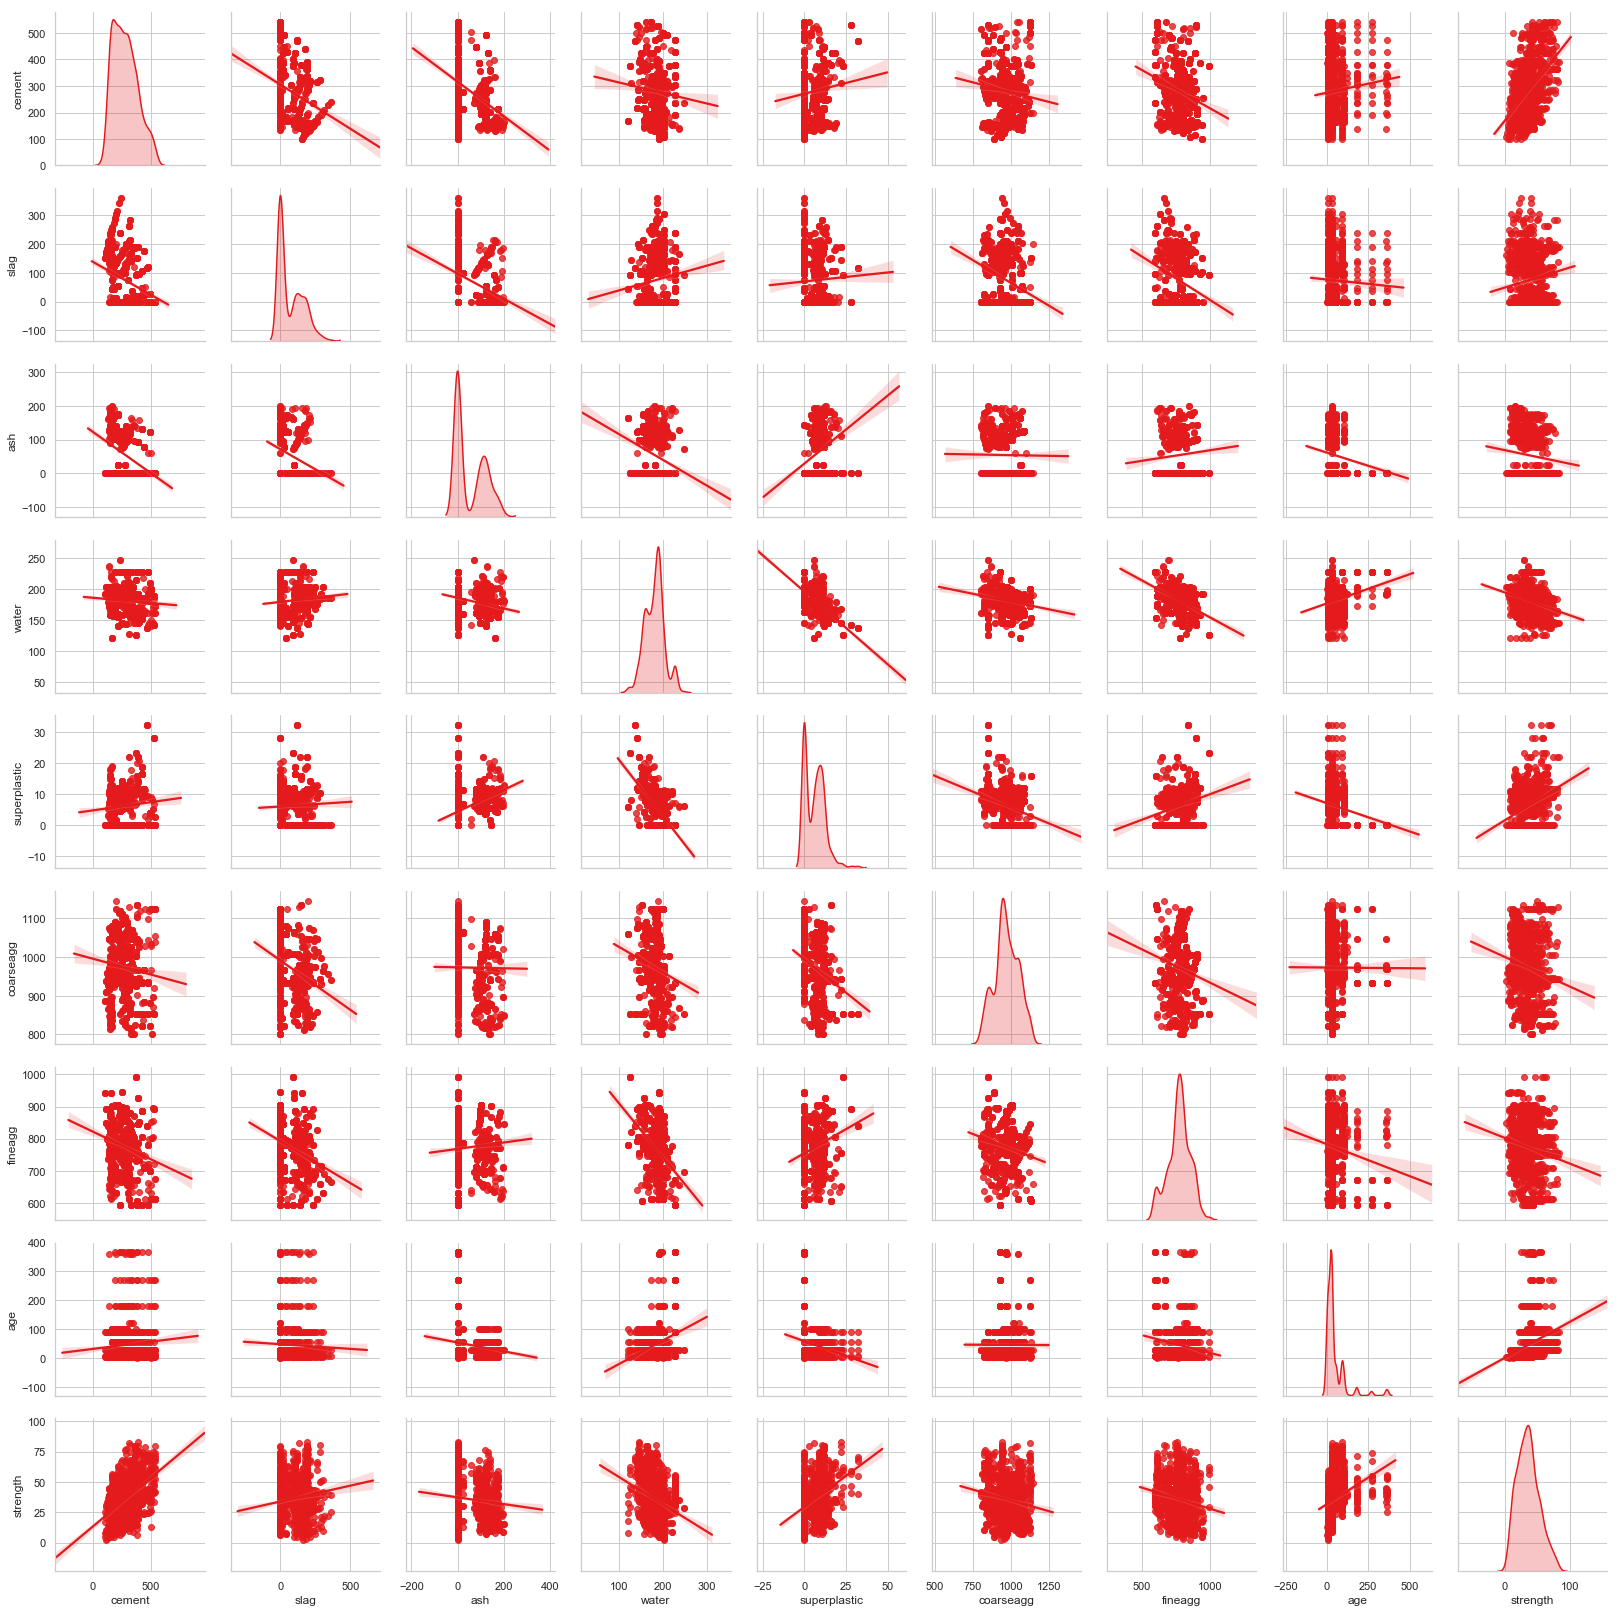

In [8]:
sns.pairplot(df, diag_kind="kde", kind="reg")

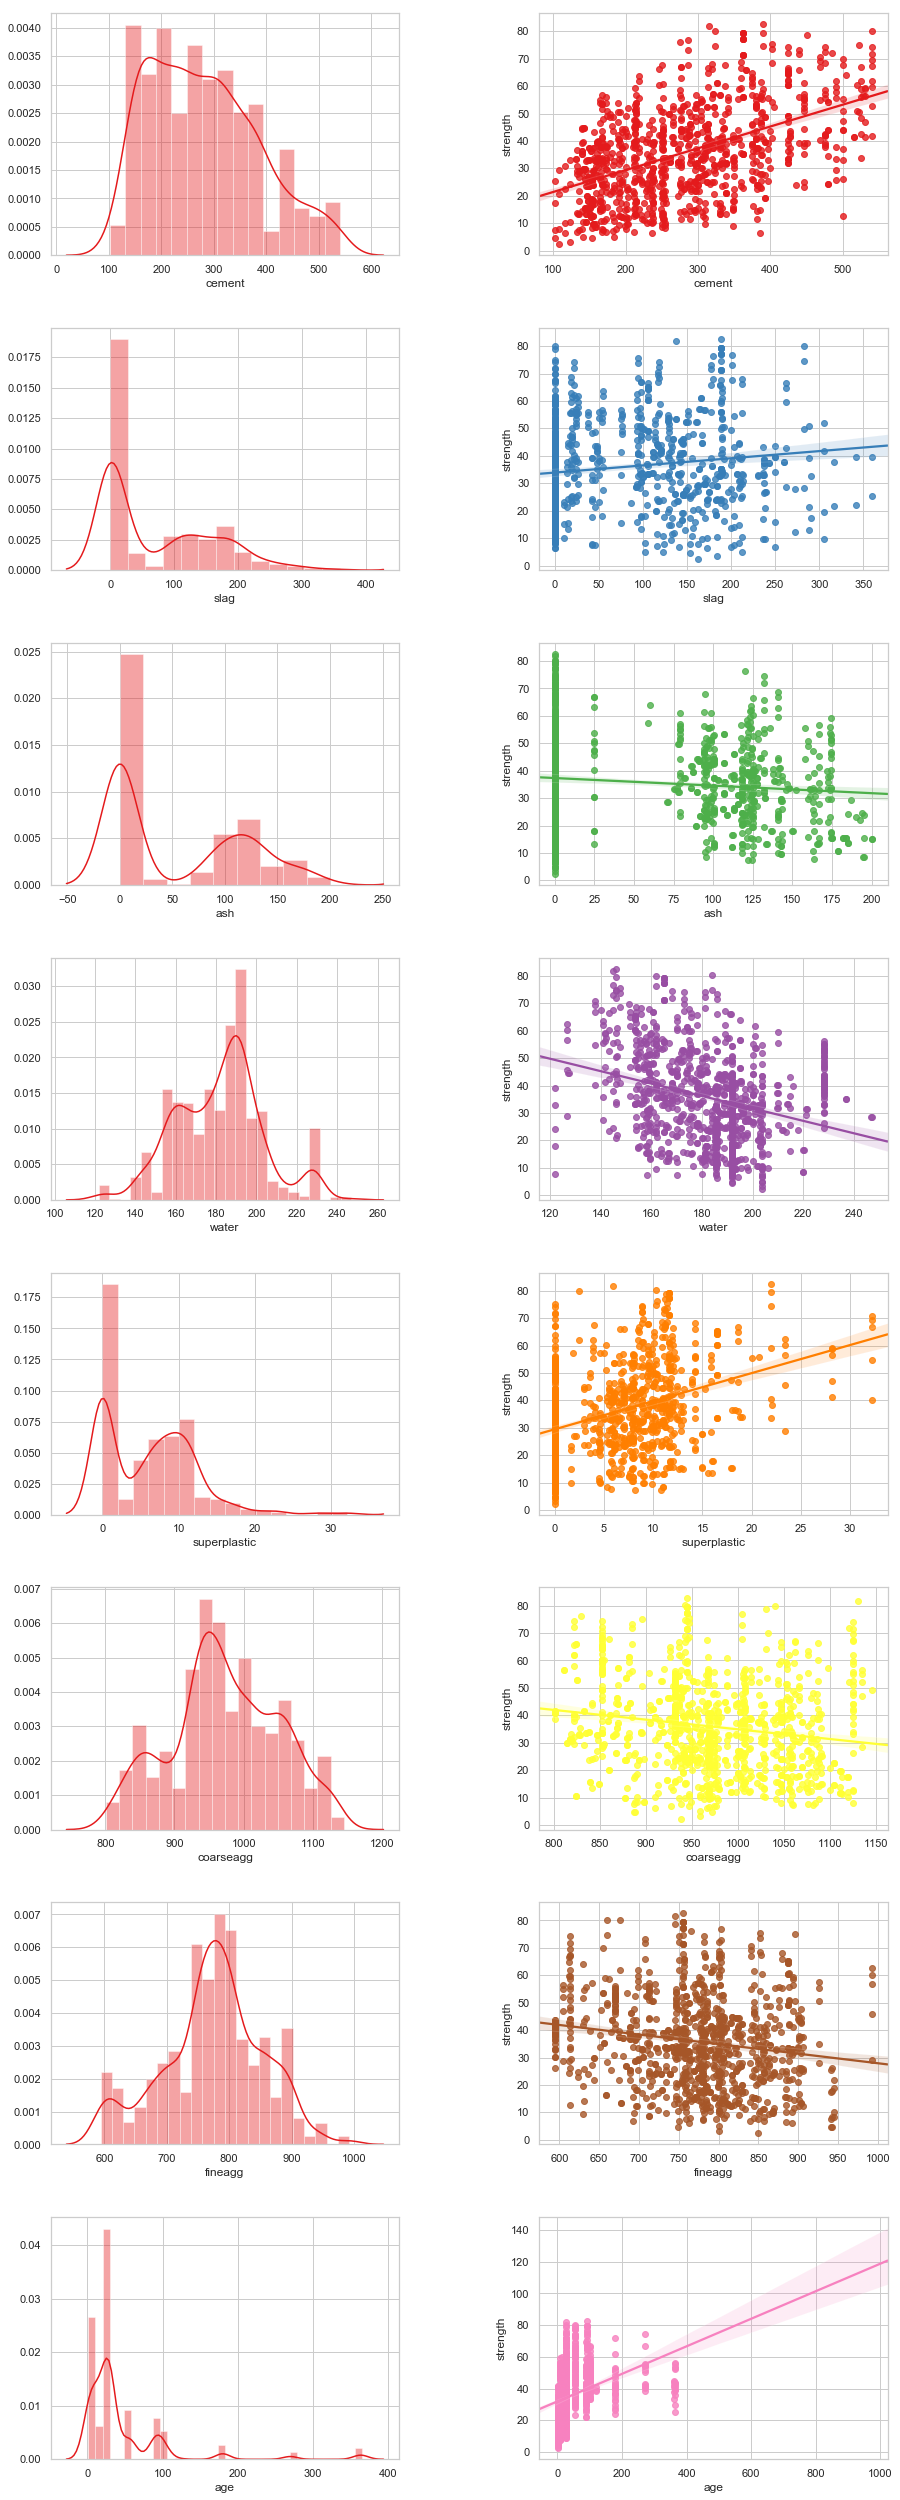

In [9]:
f, ax = plt.subplots(8, 2, figsize = (15,45))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.3)
for i in range(0, 8):
    col = df.columns[i]
    sns.distplot(df[col], ax = ax[i,0])
    sns.regplot(x = col, y='strength', data=df, ax = ax[i,1])

* Ash & Coarse Aggregate appears to have significantly less contribution to the output variable Strength as its regression plot is almost horizontal.

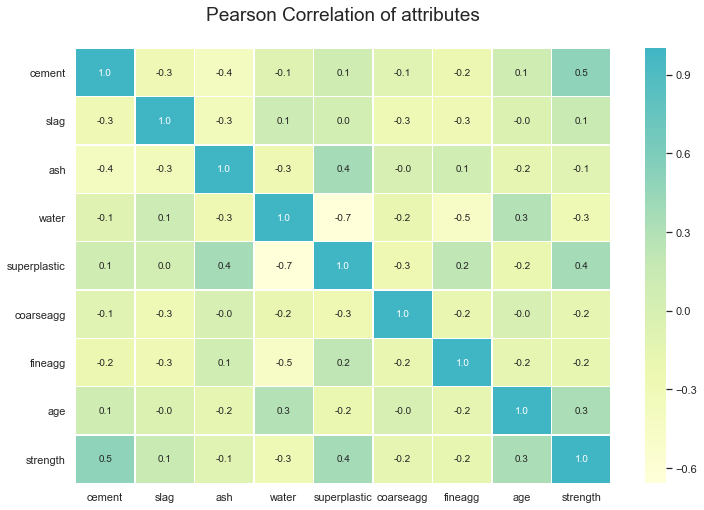

In [10]:
corr = df.corr()
plt.figure(figsize=(12, 8))
plt.title('Pearson Correlation of attributes', y=1.05, size=19)
sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=.5, fmt= '.1f', center = 1)

In [11]:
#df.replace(0, np.nan, inplace = True)
X = df.drop(columns = 'strength')
y = df.pop('strength')
from sklearn.model_selection import train_test_split
X_CV, X_test, y_CV, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_CV, y_CV, test_size=0.25, random_state=1)
print('X_train', X_train.shape, 'X_valid', X_valid.shape, 'X_CV', X_CV.shape, 'X_test', X_test.shape, 'y_train', y_train.shape, 'y_valid', y_valid.shape, 'y_CV', y_CV.shape, 'y_test', y_test.shape,)

X_train (618, 8) X_valid (206, 8) X_CV (824, 8) X_test (206, 8) y_train (618,) y_valid (206,) y_CV (824,) y_test (206,)


* Splitting data into Train Set - 60%, Validation Set - 20% & Test Set - 20% to avoid data leakage
* Also created Cross Validation set combing Training set & Validation Set

#### Pick one strategy to address the presence of outliers and missing values and perform necessary imputation

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

scaler = StandardScaler()
nan = np.nan
imputer = KNNImputer(n_neighbors=5, weights="uniform")

def scale_impute_reverse_fit(X_data, y_data):
    col = X_data.columns
    X_data = scaler.fit_transform(X_data)
#    X_data = imputer.fit_transform(X_data)
    outliers = np.unique(np.where((X_data < -3) | (X_data > 3))[0])
    print('Outliers removed with standard deviation more than ±3:', len(outliers))
    X_data = np.delete(X_data, outliers, axis=0)
    X_data = scaler.inverse_transform(X_data)
    df_data_X = pd.DataFrame(data=X_data[0:,0:], index=[i for i in range(len(X_data))], columns=[i for i in col])
    df_data_y = y_data.reset_index(drop=True).drop(index = outliers).reset_index(drop=True)
    return df_data_X, df_data_y

def scale_impute_reverse_transform(X_data, y_data):
    col = X_data.columns
    X_data = scaler.transform(X_data)
#    X_data = imputer.transform(X_data)
    outliers = np.unique(np.where((X_data < -3) | (X_data > 3))[0])
    print('Outliers removed with standard deviation more than ±3:', len(outliers))
    X_data = np.delete(X_data, outliers, axis=0)
    X_data = scaler.inverse_transform(X_data)
    df_data_X = pd.DataFrame(data=X_data[0:,0:], index=[i for i in range(len(X_data))], columns=[i for i in col])
    df_data_y = y_data.reset_index(drop=True).drop(index = outliers).reset_index(drop=True)
    return df_data_X, df_data_y

In [13]:
X_train_clean, y_train_clean = scale_impute_reverse_fit(X_train, y_train)
X_valid_clean, y_valid_clean = scale_impute_reverse_transform(X_valid, y_valid)
X_CV_clean, y_CV_clean = scale_impute_reverse_transform(X_CV, y_CV)
X_test_clean, y_test_clean = scale_impute_reverse_transform(X_test, y_test)

X_train_z = scaler.fit_transform(X_train_clean)
X_valid_z = scaler.transform(X_valid_clean)
X_CV_z = scaler.transform(X_CV_clean)
X_test_z = scaler.transform(X_test_clean)

Outliers removed with standard deviation more than ±3: 33
Outliers removed with standard deviation more than ±3: 9
Outliers removed with standard deviation more than ±3: 42
Outliers removed with standard deviation more than ±3: 7


* Did few iterations by replacing zeros based on the neighbours using KNN Imputer.
* Performance of models were better with zeros, hence continuing without replacement of zeros.
* All values above and below ±3 standard deviation is dropped considering them as outliers.
* Outliers: Training - 33 | Validation - 9 | Cross Validation (Training + Validation) - 42 | Testing - 7

### Deliverable 2: Feature Engineering techniques

#### Identify opportunities (if any) to create a composite feature, drop a feature
* Pearson correlation coefficient $ρ_{Max} = 0.5$ & $ρ_{Min} = -0.7$
* Evaluating VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_z
vif['Features'] = X_train_clean.columns
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0        cement  7.20
1          slag  6.97
6       fineagg  6.39
2           ash  6.16
3         water  5.92
5     coarseagg  4.46
4  superplastic  2.87
7           age  1.05

* As ρ is between ±0.8 & VIF is less than 10, possibility of multicollinearity may not exist

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

global df_Score, df_Scores_CV, df_Scores_CV_Mean, df_Scores_CV_Mean_F, df_Accuracy_Score, df_Accuracy_Score_F
df_Score, df_Scores_CV, df_Scores_CV_Mean, df_Scores_CV_Mean_F, df_Accuracy_Score, df_Accuracy_Score_F = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

def results(Model, model, X_train, y_train, X_valid, y_valid):
    print("", Model, "\n", '*'*55)
    f, ax = plt.subplots(1, 2, figsize = (15,7))
    
    y_predict_train = model.predict(X_train)
    n, k = X_train.shape[0], X_train.shape[1]
    R2 = round(r2_score(y_train, y_predict_train),4)
    AdjR2 = round((1-(((1-R2)*(n-1))/(n-k-1))),4)
    RMSE = round(np.sqrt(mean_squared_error(y_train, y_predict_train)),2)
    ρ = round(pearsonr(y_train, y_predict_train)[0], 4)
    Metrics, Score = [], []
    Metrics.extend(['R2', 'Adj. R2', 'RMSE', 'ρ'])
    Score.extend([R2, AdjR2, RMSE, ρ])
#    df_Score['Metrics'], df_Score[name+' Train'] = Metrics, Score
    print('In-sample     R2:', R2, '| Adj. R2:', AdjR2, '| RMSE:', RMSE, '| ρ:', ρ)
    sns.regplot(y_train, y_predict_train, ax = ax[0])
    ax[0].title.set_text('In-sample')
    
    y_predict_valid = model.predict(X_valid)
    n, k = X_valid.shape[0], X_valid.shape[1]
    R2 = round(r2_score(y_valid, y_predict_valid),4)
    AdjR2 = round((1-(((1-R2)*(n-1))/(n-k-1))),4)
    RMSE = round(np.sqrt(mean_squared_error(y_valid, y_predict_valid)),2)
    ρ = round(pearsonr(y_valid, y_predict_valid)[0], 4)
    Metrics, Metrics_F, Score, Score_1, Score_F = [], [], [], [], []
    Metrics.extend(['R2', 'Adj. R2', 'RMSE', 'ρ'])
    Metrics_F.extend(['R2', 'RMSE'])
    Score.extend([R2, AdjR2, RMSE, ρ])
    Score_1.extend([R2, RMSE])
    R2_F = R2*100
    Score_F.extend([R2_F, RMSE])
    df_Score['Metrics'], df_Score[Model] = Metrics, Score
    df_Accuracy_Score['Metrics'], df_Accuracy_Score[Model] = Metrics_F, Score_1
    df_Accuracy_Score_F['Metrics'], df_Accuracy_Score_F[Model] = Metrics_F, Score_F
    print('Out of sample R2:', R2, '| Adj. R2:', AdjR2, '| RMSE:', RMSE, '| ρ:', ρ)
    sns.regplot(y_valid, y_predict_valid, ax = ax[1])
    ax[1].title.set_text('Out of sample')
    
def ScorerMean(Model):
    Metrics, Mean_Score, Confidence_Score = [], [], []
    Metrics.extend(['R2', 'RMSE'])
    Mean_Score.append(df_Scores_CV[df_Scores_CV['Metrics'] == 'R2'][Model].mean())
    Confidence_Score.append((str(round((df_Scores_CV[df_Scores_CV['Metrics'] == 'R2'][Model].mean())*100, 2))) + (' ±'+ str(round((df_Scores_CV[df_Scores_CV['Metrics'] == 'R2'][Model].std()) * 196, 2))))
    Mean_Score.append(df_Scores_CV[df_Scores_CV['Metrics'] == 'RMSE'][Model].mean())
    Confidence_Score.append((str(round((df_Scores_CV[df_Scores_CV['Metrics'] == 'RMSE'][Model].mean()), 2))) + (' ±'+ str(round((df_Scores_CV[df_Scores_CV['Metrics'] == 'RMSE'][Model].std()) * 1.96, 2))))
    df_Scores_CV_Mean['Metrics'], df_Scores_CV_Mean[Model] = Metrics, Mean_Score
    df_Scores_CV_Mean_F['Metrics'], df_Scores_CV_Mean_F[Model] = Metrics, Confidence_Score
    df_Accuracy_Score['Metrics'], df_Accuracy_Score[Model] = Metrics, Mean_Score
    df_Accuracy_Score_F['Metrics'], df_Accuracy_Score_F[Model] = Metrics, Confidence_Score

In [16]:
from sklearn.model_selection import KFold

global df_Scores_CV
df_Scores_CV = pd.DataFrame()

def Kfold(Model, model, X, y):
    X, y = X.to_numpy(), np.array(y)
    Metrics, Score = [], []
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_predict_test = model.predict(X_test)
        n, k = X_test.shape[0], X_test.shape[1]
        R2 = round(r2_score(y_test, y_predict_test),4)
        RMSE = round(np.sqrt(mean_squared_error(y_test, y_predict_test)),2)
        Metrics.extend(['R2', 'RMSE'])
        Score.extend([R2, RMSE])
    df_Scores_CV['Metrics'], df_Scores_CV[Model] = Metrics, Score
    ScorerMean(Model)

The coefficient for cement is 0.1225
The coefficient for slag is 0.1058
The coefficient for ash is 0.0821
The coefficient for water is -0.1462
The coefficient for superplastic is 0.3313
The coefficient for coarseagg is 0.0165
The coefficient for fineagg is 0.0261
The coefficient for age is 0.2086
 *******************************************************
 LR_Deg_1 
 *******************************************************
In-sample     R2: 0.6895 | Adj. R2: 0.6852 | RMSE: 9.07 | ρ: 0.8303
Out of sample R2: 0.7278 | Adj. R2: 0.7162 | RMSE: 9.09 | ρ: 0.8703


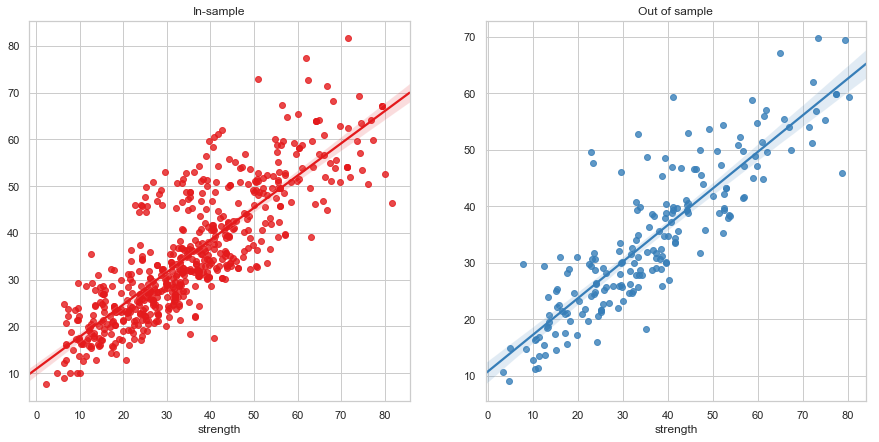

In [17]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train_clean, y_train_clean)
for idx, col in enumerate(X_train_clean.columns):
    print("The coefficient for {0} is {1:.4f}".format(col, LR_model.coef_[idx]))
print("", '*'*55)
results('LR_Deg_1', LR_model, X_train_clean, y_train_clean, X_valid_clean, y_valid_clean)

In [18]:
Model_name = 'LR_Deg_1 KCV'
Kfold(Model_name, LR_model, X_CV_clean, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      67.91 ±14.93
RMSE      9.17 ±1.72
Name: LR_Deg_1 KCV, dtype: object

In [19]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_clean)
LR_OLS = sm.OLS(y_train_clean, X_train_lm).fit()
print(LR_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sun, 05 Apr 2020   Prob (F-statistic):          7.23e-141
Time:                        11:13:46   Log-Likelihood:                -2119.9
No. Observations:                 585   AIC:                             4258.
Df Residuals:                     576   BIC:                             4297.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -31.2923     29.930     -1.046   

Dropping 'coarseagg' & 'fineagg' as its contribution to the model is very less
* Iteration 1: Coarse Aggregate P value 0.122 > 0.05
* Iteration 2: Fine Aggregate P value 0.122 > 0.05

In [20]:
drop_col = ['coarseagg', 'fineagg']
X_train_FS = X_train_clean.drop(columns = drop_col)
X_train_lm = sm.add_constant(X_train_FS)
LR_OLS = sm.OLS(y_train_clean, X_train_lm).fit()
ŷ = LR_OLS.predict(X_train_lm)
print(LR_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sun, 05 Apr 2020   Prob (F-statistic):          3.70e-142
Time:                        11:13:46   Log-Likelihood:                -2122.3
No. Observations:                 585   AIC:                             4259.
Df Residuals:                     578   BIC:                             4289.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           26.0893      5.057      5.159   

After dropping Coarse Aggregate & Fine Aggregate
* 𝑅2 dropped by 0.002 from 0.689 to 0.687
* Adj. 𝑅2 dropped by 0.001 from 0.685 to 0.684

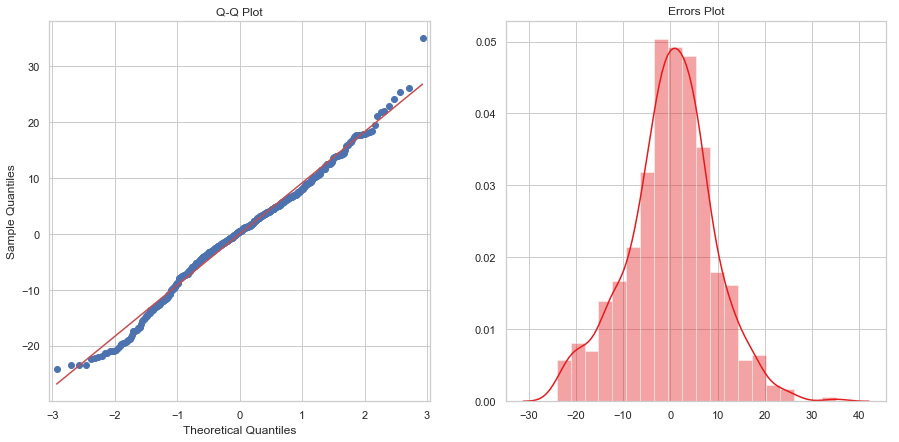

In [21]:
f, ax = plt.subplots(1, 2, figsize = (15,7))
sm.qqplot(LR_OLS.resid, line='r', ax = ax[0])
ax[0].title.set_text('Q-Q Plot')
sns.distplot((y_train_clean - ŷ), bins = 20, ax = ax[1])
ax[1].title.set_text('Errors Plot')

Residuals appears to be nearly a normal distribution with a slight right tail.

In [22]:
def combiner(X):
    X_New = X.copy(deep=True)
    X_New['comb'] = X_New['coarseagg'] * X_New['fineagg']
    drop_col = ['coarseagg', 'fineagg']
    X_New = X_New.drop(columns = drop_col)
    return X_New

X_train_comb_clean = combiner(X_train_clean)
X_valid_comb_clean = combiner(X_valid_clean)
X_test_comb_clean = combiner(X_test_clean)
X_CV_comb_clean = combiner(X_CV_clean)

X_train_comb = combiner(X_train)
X_valid_comb = combiner(X_valid)
X_test_comb = combiner(X_test)
X_CV_comb = combiner(X_CV)

In [23]:
X_train_lm = sm.add_constant(X_train_comb_clean)
LR_OLS = sm.OLS(y_train_clean, X_train_lm).fit()
ŷ = LR_OLS.predict(X_train_lm)
print(LR_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 05 Apr 2020   Prob (F-statistic):          1.77e-142
Time:                        11:13:47   Log-Likelihood:                -2118.8
No. Observations:                 585   AIC:                             4254.
Df Residuals:                     577   BIC:                             4289.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -25.9837     20.335     -1.278   

After combining Coarse Aggregate & Fine Aggregate to create a composite feature
* 𝑅2 improved by 0.002 from 0.689 to 0.691
* Adj. 𝑅2 improved by 0.002 from 0.685 to 0.687

The coefficient for cement is 0.1272
The coefficient for slag is 0.1114
The coefficient for ash is 0.0867
The coefficient for water is -0.1226
The coefficient for superplastic is 0.3756
The coefficient for age is 0.2085
The coefficient for comb is 0.0000
 *******************************************************
 Ridge_Deg_1 
 *******************************************************
In-sample     R2: 0.6906 | Adj. R2: 0.6868 | RMSE: 9.05 | ρ: 0.831
Out of sample R2: 0.7284 | Adj. R2: 0.7183 | RMSE: 9.08 | ρ: 0.8702


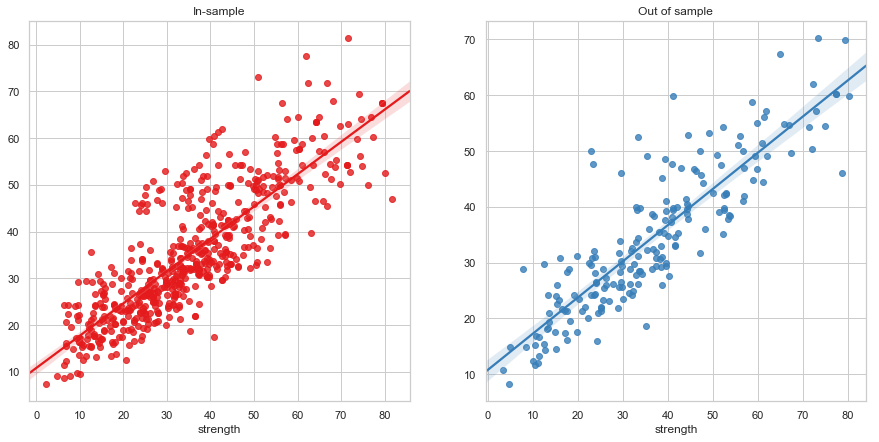

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.3, random_state= 1)
ridge.fit(X_train_comb_clean, y_train_clean)
for idx, col in enumerate(X_train_comb_clean.columns):
    print("The coefficient for {0} is {1:.4f}".format(col, ridge.coef_[idx]))
print("", '*'*55)
results('Ridge_Deg_1', ridge, X_train_comb_clean, y_train_clean, X_valid_comb_clean, y_valid_clean)

In [25]:
Model_name = 'Ridge_Deg_1 KCV'
Kfold(Model_name, ridge, X_CV_comb_clean, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      68.09 ±14.87
RMSE       9.15 ±1.7
Name: Ridge_Deg_1 KCV, dtype: object

The coefficient for cement is 0.1271
The coefficient for slag is 0.1113
The coefficient for ash is 0.0870
The coefficient for water is -0.1258
The coefficient for superplastic is 0.3568
The coefficient for age is 0.2082
The coefficient for comb is 0.0000
 *******************************************************
 Lasso_Deg_1 
 *******************************************************
In-sample     R2: 0.6906 | Adj. R2: 0.6868 | RMSE: 9.05 | ρ: 0.831
Out of sample R2: 0.7281 | Adj. R2: 0.718 | RMSE: 9.09 | ρ: 0.8702


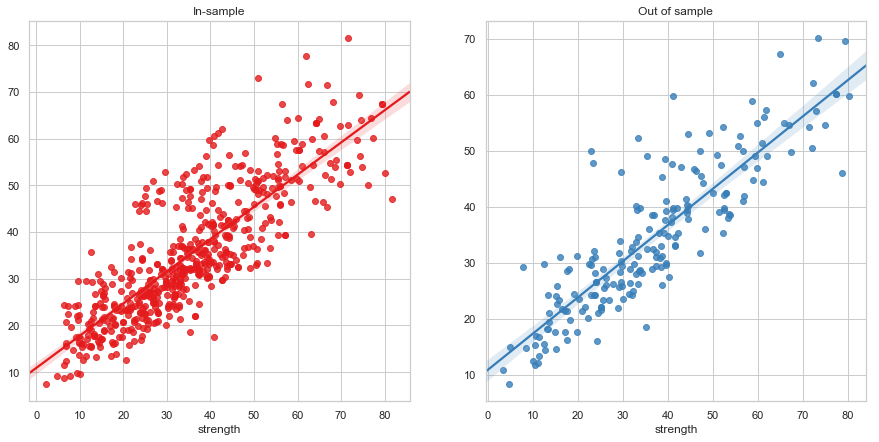

In [26]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3, random_state= 1)
lasso.fit(X_train_comb_clean, y_train_clean)
for idx, col in enumerate(X_train_comb_clean.columns):
    print("The coefficient for {0} is {1:.4f}".format(col, lasso.coef_[idx]))
print("", '*'*55)
results('Lasso_Deg_1', lasso, X_train_comb_clean, y_train_clean, X_valid_comb_clean, y_valid_clean)

In [27]:
Model_name = 'Lasso_Deg_1 KCV'
Kfold(Model_name, lasso, X_CV_comb_clean, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      68.09 ±14.83
RMSE       9.15 ±1.7
Name: Lasso_Deg_1 KCV, dtype: object

* Coefficient for composite feature attribute that was a combination of Coarse Aggregate * Fine Aggregate turned 0 in ridge & lasso

Text(0.5, 0, 'Eigen Value')

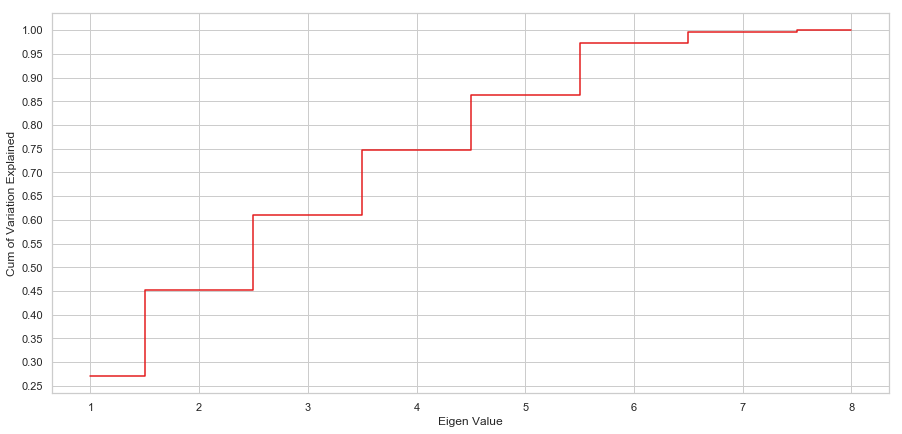

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(X_train_z)
plt.figure(figsize=(15, 7))
plt.step(list(range(1, 9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.yticks(np.arange(0.25, 1.05, step=0.05))
plt.xticks(np.arange(1, 9, step=1))
plt.ylabel('Cum of Variation Explained')
plt.xlabel('Eigen Value')

In [29]:
pca = PCA(n_components=7)
pca.fit(X_train_z)
data_PCA = pca.transform(X_train_z)
XPCA_train = pd.DataFrame(data=data_PCA[0:,0:], index=[i for i in range(data_PCA.shape[0])], columns=['X' + str(i) for i in range(data_PCA.shape[1])])
data_PCA = pca.transform(X_valid_z)
XPCA_valid = pd.DataFrame(data=data_PCA[0:,0:], index=[i for i in range(data_PCA.shape[0])], columns=['X' + str(i) for i in range(data_PCA.shape[1])])
data_PCA = pca.transform(X_CV_z)
XPCA_CV = pd.DataFrame(data=data_PCA[0:,0:], index=[i for i in range(data_PCA.shape[0])], columns=['X' + str(i) for i in range(data_PCA.shape[1])])
XPCA_train.head()

X0        X1        X2        X3        X4        X5        X6
0  1.564622  0.942782  0.497953 -1.599133  0.195688  0.127572  0.320632
1  1.054766  1.215932 -0.125049  0.555929 -1.223962 -0.774932 -0.201955
2 -0.549985  1.493120  2.371916 -0.717314 -1.082453 -0.285353  1.136146
3  1.358363  1.337492  0.547035  0.589438 -0.722174 -0.917592  0.040368
4 -1.032672  1.176539 -1.935134 -1.518711 -0.581163  0.779444  1.152775

 LR_PCA 
 *******************************************************
In-sample     R2: 0.6702 | Adj. R2: 0.6662 | RMSE: 9.35 | ρ: 0.8186
Out of sample R2: 0.7095 | Adj. R2: 0.6987 | RMSE: 9.39 | ρ: 0.861


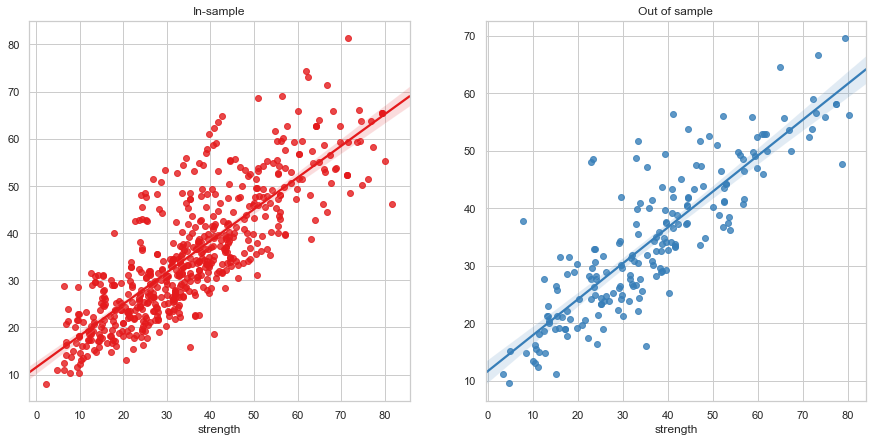

In [30]:
LR_model = LinearRegression()
LR_model.fit(XPCA_train, y_train_clean)
results('LR_PCA', LR_model, XPCA_train, y_train_clean, XPCA_valid, y_valid_clean)

In [31]:
Model_name = 'LR_PCA KCV'
Kfold(Model_name, LR_model, XPCA_CV, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      66.09 ±15.29
RMSE      9.44 ±1.83
Name: LR_PCA KCV, dtype: object

* All linear models validation scores were in the range from 70 to 73% and RMSE between 9 & 9.3
* Explored PCA also with 7 components

#### Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

In [32]:
from sklearn.preprocessing import PolynomialFeatures

Degree = 2

poly = PolynomialFeatures(degree = Degree, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_clean)
X_valid_poly = poly.transform(X_valid_clean)
X_CV_poly = poly.transform(X_CV_clean)
col = poly.get_feature_names(input_features=X_train_clean.columns)

X_train_poly = (pd.DataFrame(data=X_train_poly[0:,0:], index=[i for i in range(len(X_train_poly))], columns=[i for i in col])).drop('1', axis = 1)
X_valid_poly = (pd.DataFrame(data=X_valid_poly[0:,0:], index=[i for i in range(len(X_valid_poly))], columns=[i for i in col])).drop('1', axis = 1)
X_CV_poly = (pd.DataFrame(data=X_CV_poly[0:,0:], index=[i for i in range(len(X_CV_poly))], columns=[i for i in col])).drop('1', axis = 1)

X_train_poly.head()

cement  slag    ash  water  superplastic  coarseagg  fineagg    age  \
0   393.0   0.0    0.0  192.0  8.881784e-16      940.6    785.6   90.0   
1   295.0   0.0    0.0  185.0  8.881784e-16     1069.0    769.0    7.0   
2   500.0   0.0    0.0  140.0  4.000000e+00      966.0    853.0   28.0   
3   382.5   0.0    0.0  185.7  8.881784e-16     1047.8    739.3    7.0   
4   165.0   0.0  143.6  163.8  8.881784e-16     1005.6    900.9  100.0   

   cement slag  cement ash  ...  water superplastic  water coarseagg  \
0          0.0         0.0  ...        1.705303e-13        180595.20   
1          0.0         0.0  ...        1.643130e-13        197765.00   
2          0.0         0.0  ...        5.600000e+02        135240.00   
3          0.0         0.0  ...        1.649347e-13        194576.46   
4          0.0     23694.0  ...        1.454836e-13        164717.28   

   water fineagg  water age  superplastic coarseagg  superplastic fineagg  \
0      150835.20    17280.0            8.354206e-13          6.977530e-13   
1      142265.00     1295.0            9.494627e-13          6.830092e-13   
2      119420.00     3920.0            3.864000e+03          3.412000e+03   
3      137288.01     1299.9            9.306333e-13          6.566303e-13   
4      147567.42    16380.0            8.931522e-13          8.001599e-13   

   superplastic age  coarseagg fineagg  coarseagg age  fineagg age  
0      7.993606e-14          738935.36        84654.0      70704.0  
1      6.217249e-15          822061.00         7483.0       5383.0  
2      1.120000e+02          823998.00        27048.0      23884.0  
3      6.217249e-15          774638.54         7334.6       5175.1  
4      8.881784e-14          905945.04       100560.0      90090.0  

[5 rows x 36 columns]

In [33]:
Degree = 3

poly = PolynomialFeatures(degree = Degree, interaction_only=True)
X_train_poly_3 = poly.fit_transform(X_train_clean)
X_valid_poly_3 = poly.transform(X_valid_clean)
X_CV_poly_3 = poly.transform(X_CV_clean)
col = poly.get_feature_names(input_features=X_train_clean.columns)

X_train_poly_3 = (pd.DataFrame(data=X_train_poly_3[0:,0:], index=[i for i in range(len(X_train_poly_3))], columns=[i for i in col])).drop('1', axis = 1)
X_valid_poly_3 = (pd.DataFrame(data=X_valid_poly_3[0:,0:], index=[i for i in range(len(X_valid_poly_3))], columns=[i for i in col])).drop('1', axis = 1)
X_CV_poly_3 = (pd.DataFrame(data=X_CV_poly_3[0:,0:], index=[i for i in range(len(X_CV_poly_3))], columns=[i for i in col])).drop('1', axis = 1)

X_train_poly_3.head()

cement  slag    ash  water  superplastic  coarseagg  fineagg    age  \
0   393.0   0.0    0.0  192.0  8.881784e-16      940.6    785.6   90.0   
1   295.0   0.0    0.0  185.0  8.881784e-16     1069.0    769.0    7.0   
2   500.0   0.0    0.0  140.0  4.000000e+00      966.0    853.0   28.0   
3   382.5   0.0    0.0  185.7  8.881784e-16     1047.8    739.3    7.0   
4   165.0   0.0  143.6  163.8  8.881784e-16     1005.6    900.9  100.0   

   cement slag  cement ash  ...  water superplastic coarseagg  \
0          0.0         0.0  ...                  1.604008e-10   
1          0.0         0.0  ...                  1.756506e-10   
2          0.0         0.0  ...                  5.409600e+05   
3          0.0         0.0  ...                  1.728186e-10   
4          0.0     23694.0  ...                  1.462983e-10   

   water superplastic fineagg  water superplastic age  \
0                1.339686e-10            1.534772e-11   
1                1.263567e-10            1.150191e-12   
2                4.776800e+05            1.568000e+04   
3                1.219362e-10            1.154543e-12   
4                1.310662e-10            1.454836e-11   

   water coarseagg fineagg  water coarseagg age  water fineagg age  \
0             1.418756e+08          16253568.00        13575168.00   
1             1.520813e+08           1384355.00          995855.00   
2             1.153597e+08           3786720.00         3343760.00   
3             1.438504e+08           1362035.22          961016.07   
4             1.483938e+08          16471728.00        14756742.00   

   superplastic coarseagg fineagg  superplastic coarseagg age  \
0                    6.563064e-10                7.518786e-11   
1                    7.301368e-10                6.646239e-12   
2                    3.295992e+06                1.081920e+05   
3                    6.880172e-10                6.514433e-12   
4                    8.046408e-10                8.931522e-11   

   superplastic fineagg age  coarseagg fineagg age  
0              6.279777e-11            66504182.40  
1              4.781064e-12             5754427.00  
2              9.553600e+04            23071944.00  
3              4.596412e-12             5422469.78  
4              8.001599e-11            90594504.00  

[5 rows x 92 columns]

 LR_Deg_2 
 *******************************************************
In-sample     R2: 0.7812 | Adj. R2: 0.7668 | RMSE: 7.61 | ρ: 0.8839
Out of sample R2: 0.7916 | Adj. R2: 0.7447 | RMSE: 7.95 | ρ: 0.896


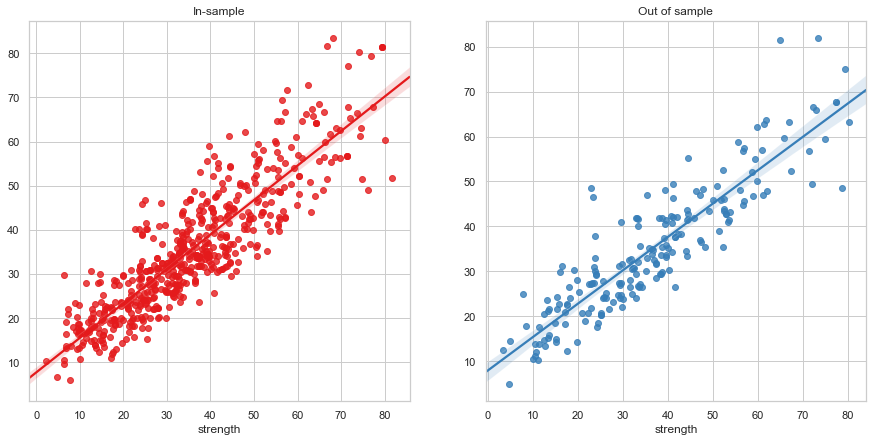

In [34]:
LR_model = LinearRegression()
LR_model.fit(X_train_poly, y_train_clean)
results('LR_Deg_2', LR_model, X_train_poly, y_train_clean, X_valid_poly, y_valid_clean)

In [35]:
Model_name = 'LR_Deg_2 KCV'
Kfold(Model_name, LR_model, X_CV_poly, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      73.64 ±14.13
RMSE      8.28 ±1.51
Name: LR_Deg_2 KCV, dtype: object

 Ridge_Deg_2 
 *******************************************************
In-sample     R2: 0.7812 | Adj. R2: 0.7668 | RMSE: 7.61 | ρ: 0.8838
Out of sample R2: 0.7916 | Adj. R2: 0.7447 | RMSE: 7.95 | ρ: 0.896


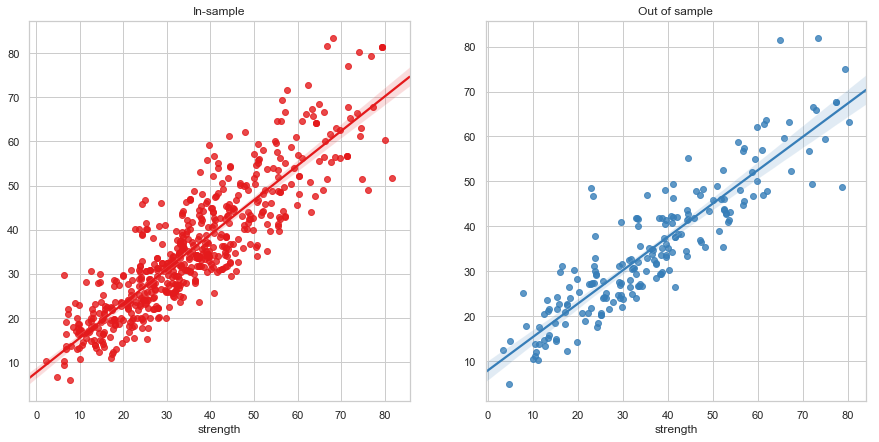

In [36]:
ridge = Ridge(alpha=0.3, random_state= 1)
ridge.fit(X_train_poly, y_train_clean)
results('Ridge_Deg_2', ridge, X_train_poly, y_train_clean, X_valid_poly, y_valid_clean)

In [37]:
Model_name = 'Ridge_Deg_2 KCV'
Kfold(Model_name, ridge, X_CV_poly, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      73.68 ±14.05
RMSE      8.28 ±1.51
Name: Ridge_Deg_2 KCV, dtype: object

 Lasso_Deg_2 
 *******************************************************
In-sample     R2: 0.7789 | Adj. R2: 0.7644 | RMSE: 7.65 | ρ: 0.8826
Out of sample R2: 0.8003 | Adj. R2: 0.7554 | RMSE: 7.79 | ρ: 0.9019


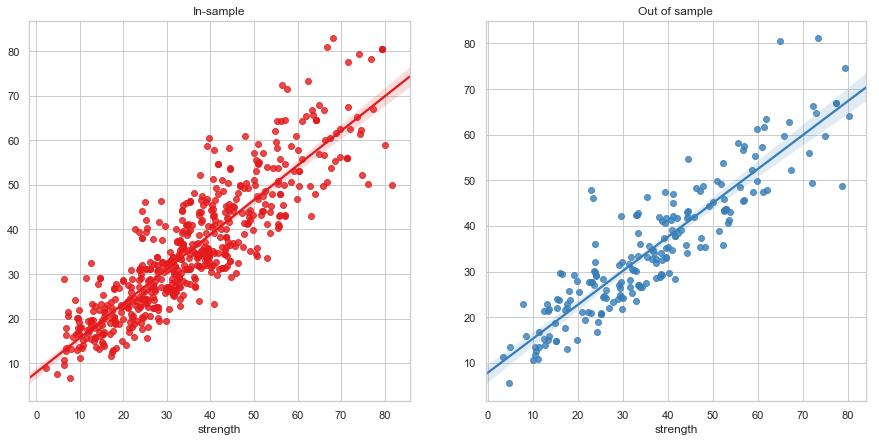

In [38]:
lasso = Lasso(alpha=0.3, random_state= 1)
lasso.fit(X_train_poly, y_train_clean)
results('Lasso_Deg_2', lasso, X_train_poly, y_train_clean, X_valid_poly, y_valid_clean)

In [39]:
Model_name = 'Lasso_Deg_2 KCV'
Kfold(Model_name, lasso, X_CV_poly, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      74.61 ±12.31
RMSE      8.15 ±1.48
Name: Lasso_Deg_2 KCV, dtype: object

 LR_Deg_3 
 *******************************************************
In-sample     R2: 0.8258 | Adj. R2: 0.7932 | RMSE: 6.79 | ρ: 0.9088
Out of sample R2: 0.8133 | Adj. R2: 0.6481 | RMSE: 7.53 | ρ: 0.903


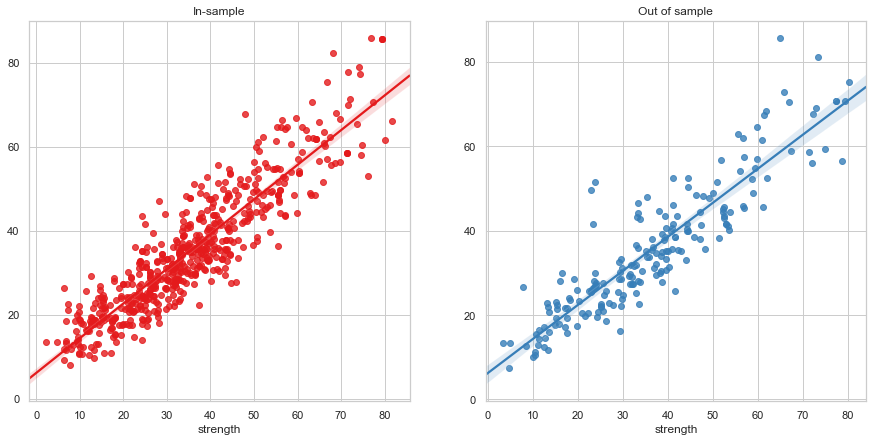

In [40]:
LR_model = LinearRegression()
LR_model.fit(X_train_poly_3, y_train_clean)
results('LR_Deg_3', LR_model, X_train_poly_3, y_train_clean, X_valid_poly_3, y_valid_clean)

In [41]:
Model_name = 'LR_Deg_3 KCV'
Kfold(Model_name, LR_model, X_CV_poly_3, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      70.62 ±19.87
RMSE      8.68 ±2.15
Name: LR_Deg_3 KCV, dtype: object

 Ridge_Deg_3 
 *******************************************************
In-sample     R2: 0.825 | Adj. R2: 0.7923 | RMSE: 6.81 | ρ: 0.9083
Out of sample R2: 0.8139 | Adj. R2: 0.6493 | RMSE: 7.52 | ρ: 0.9036


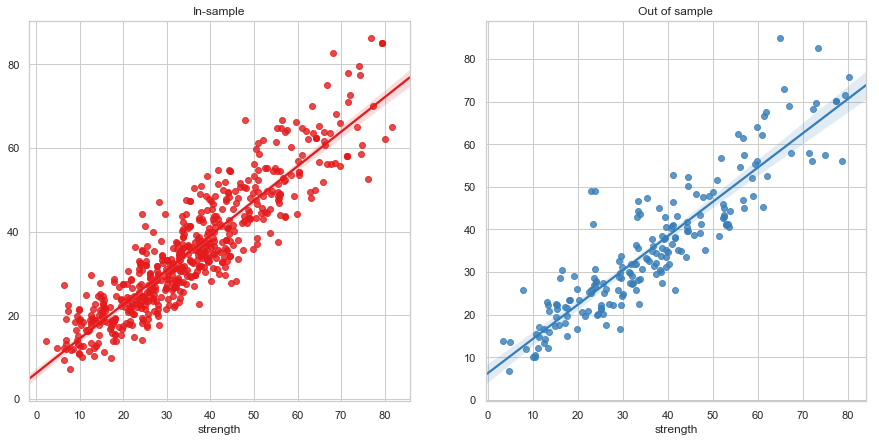

In [42]:
ridge = Ridge(alpha=0.3, random_state= 1)
ridge.fit(X_train_poly_3, y_train_clean)
results('Ridge_Deg_3', ridge, X_train_poly_3, y_train_clean, X_valid_poly_3, y_valid_clean)

In [43]:
Model_name = 'Ridge_Deg_3 KCV'
Kfold(Model_name, ridge, X_CV_poly_3, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      70.79 ±20.0
RMSE     8.66 ±2.18
Name: Ridge_Deg_3 KCV, dtype: object

 Lasso_Deg_3 
 *******************************************************
In-sample     R2: 0.8006 | Adj. R2: 0.7633 | RMSE: 7.27 | ρ: 0.8948
Out of sample R2: 0.8091 | Adj. R2: 0.6402 | RMSE: 7.61 | ρ: 0.9022


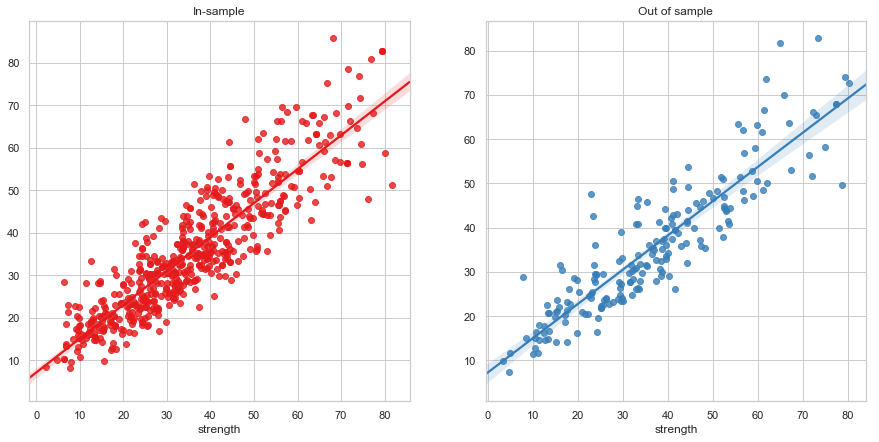

In [44]:
lasso = Lasso(alpha=0.3, random_state= 1)
lasso.fit(X_train_poly_3, y_train_clean)
results('Lasso_Deg_3', lasso, X_train_poly_3, y_train_clean, X_valid_poly_3, y_valid_clean)

In [45]:
Model_name = 'Lasso_Deg_3 KCV'
Kfold(Model_name, lasso, X_CV_poly_3, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      73.26 ±15.12
RMSE      8.33 ±1.78
Name: Lasso_Deg_3 KCV, dtype: object

LR_Deg_1  Ridge_Deg_1  Lasso_Deg_1  LR_PCA  LR_Deg_2  Ridge_Deg_2  \
Metrics                                                                      
R2         0.7278       0.7284       0.7281  0.7095    0.7916       0.7916   
Adj. R2    0.7162       0.7183       0.7180  0.6987    0.7447       0.7447   
RMSE       9.0900       9.0800       9.0900  9.3900    7.9500       7.9500   
ρ          0.8703       0.8702       0.8702  0.8610    0.8960       0.8960   

         Lasso_Deg_2  LR_Deg_3  Ridge_Deg_3  Lasso_Deg_3  
Metrics                                                   
R2            0.8003    0.8133       0.8139       0.8091  
Adj. R2       0.7554    0.6481       0.6493       0.6402  
RMSE          7.7900    7.5300       7.5200       7.6100  
ρ             0.9019    0.9030       0.9036       0.9022

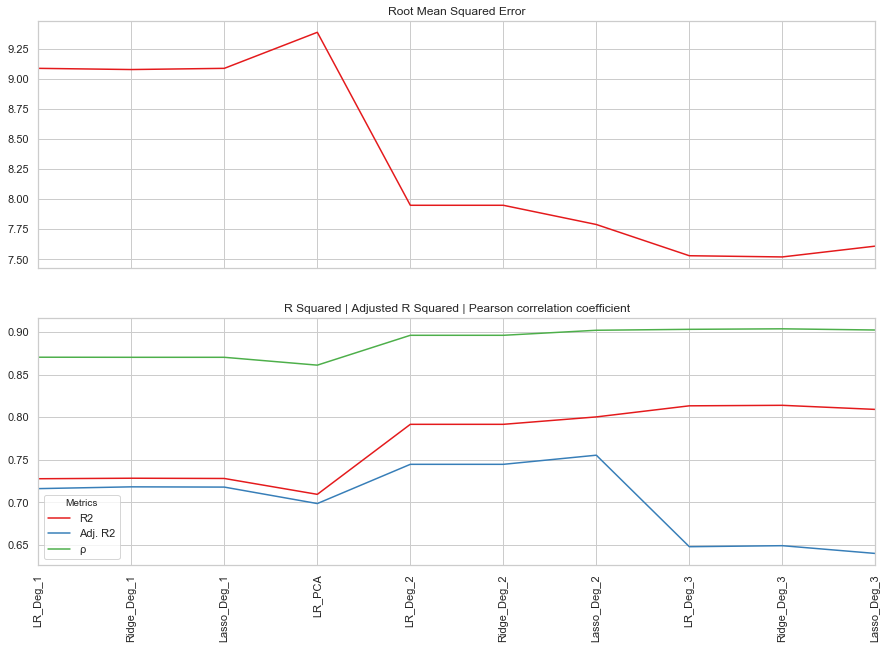

In [46]:
f, ax = plt.subplots(2, 1, sharex = True, figsize = (15, 10))
df_Score.set_index('Metrics').T.drop('RMSE', axis = 1).plot(grid=True, ax = ax[1])
ax[1].set_xticks(np.arange(0, 18, 1))
ax[1].set_xticklabels(labels = df_Score.T.index[1:].tolist(), rotation=90)
ax[1].title.set_text('R Squared | Adjusted R Squared | Pearson correlation coefficient')
df_Scores = pd.DataFrame(df_Score.iloc[2].values[1:].tolist(), columns = ["RMSE"], index = df_Score.columns[1:])
df_Scores['RMSE'].T.plot(ax = ax[0])
ax[0].title.set_text('Root Mean Squared Error')
df_Score.set_index('Metrics')

LR_Deg_1 KCV Ridge_Deg_1 KCV Lasso_Deg_1 KCV    LR_PCA KCV  \
Metrics                                                               
R2       67.91 ±14.93    68.09 ±14.87    68.09 ±14.83  66.09 ±15.29   
RMSE       9.17 ±1.72       9.15 ±1.7       9.15 ±1.7    9.44 ±1.83   

         LR_Deg_2 KCV Ridge_Deg_2 KCV Lasso_Deg_2 KCV  LR_Deg_3 KCV  \
Metrics                                                               
R2       73.64 ±14.13    73.68 ±14.05    74.61 ±12.31  70.62 ±19.87   
RMSE       8.28 ±1.51      8.28 ±1.51      8.15 ±1.48    8.68 ±2.15   

        Ridge_Deg_3 KCV Lasso_Deg_3 KCV  
Metrics                                  
R2          70.79 ±20.0    73.26 ±15.12  
RMSE         8.66 ±2.18      8.33 ±1.78

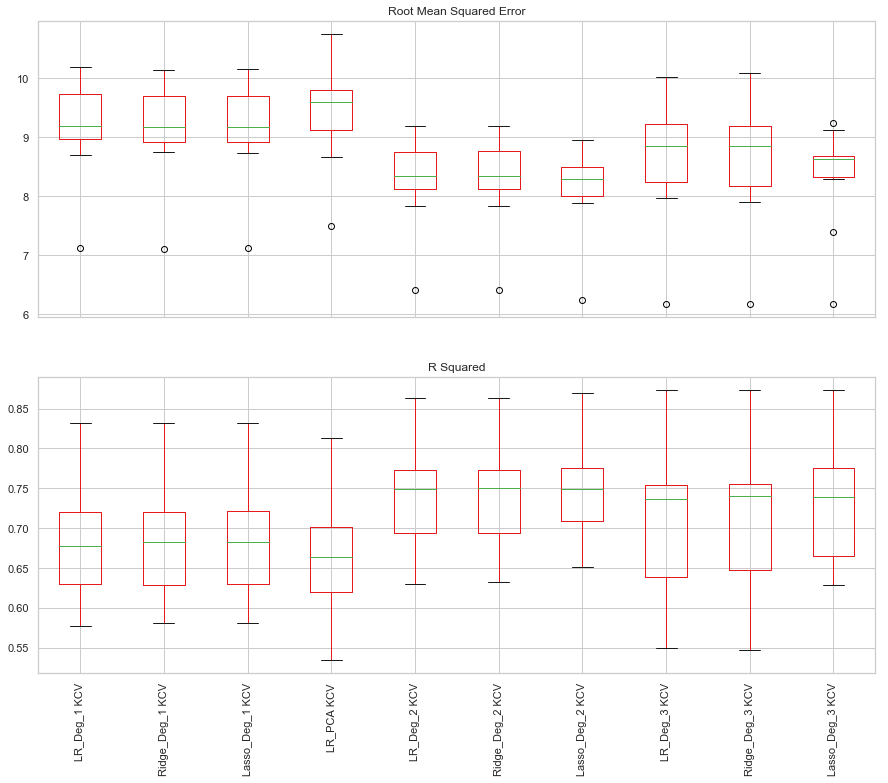

In [47]:
df_Scores_CV_R2 = df_Scores_CV[df_Scores_CV['Metrics'] == 'R2']
df_Scores_CV_RMSE = df_Scores_CV[df_Scores_CV['Metrics'] == 'RMSE']

f, ax = plt.subplots(2, 1, sharex = True, figsize = (15, 12))
df_Scores_CV_RMSE.plot(kind='box', ax = ax[0])
ax[1].title.set_text('R Squared')
ax[0].title.set_text('Root Mean Squared Error')
df_Scores_CV_R2.plot(kind='box', ax = ax[1])
plt.xticks(rotation=90)
df_Scores_CV_Mean_F.set_index('Metrics')

Quadratic & cubic models showed improvement in performance compared to linear
* 𝑅2 varied between 79.16 & 81.39, an increase of around 9%
* RMSE varied between 7.95 & 7.52, a drop of 1.5
* Adjusted 𝑅2 improved for quadratic models by 3-4%, while dropped for cubic by 7%

Quadratic models performed better than linear & cubic in cross validation while gap between 𝑅2 & Adjusted 𝑅2 increased due to additional features

#### Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength
* Mixing up of gaussians occur when data is collected for different processes or segments and combined in to single analytics base table (ABT)

Grouped 2 cluster boxplots based on zeros and non-zeros


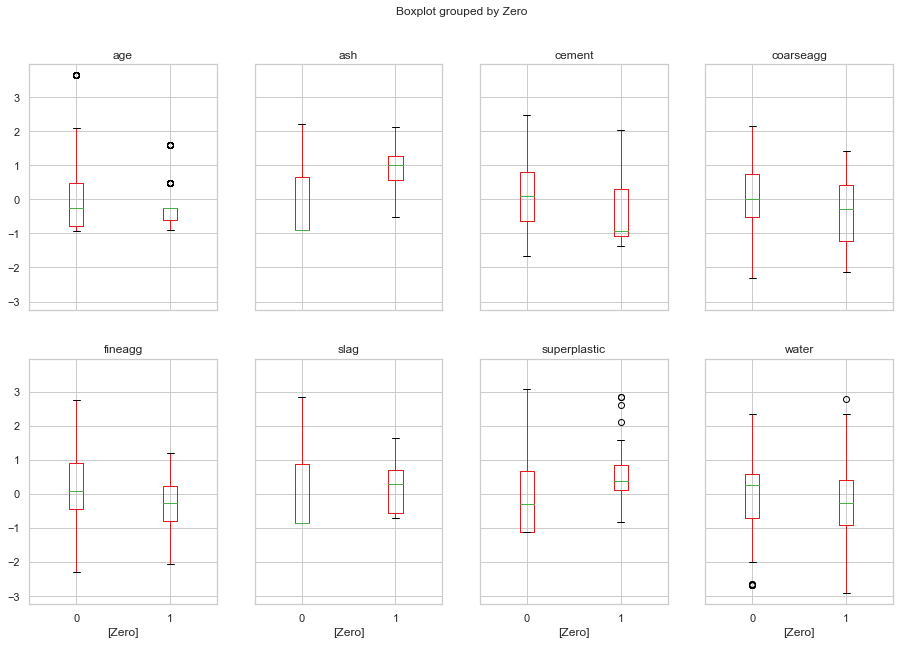

In [48]:
from scipy.stats import zscore

df_cluster_0 = X_train_clean.copy(deep=True)
df_0 = pd.DataFrame()
df_0['Zero'] = pd.Series(np.ones(df_cluster_0.shape[0])).astype('int64')
df_0.loc[(df_cluster_0['superplastic'] == 0)|(df_cluster_0['slag'] == 0)|(df_cluster_0['ash'] == 0),'Zero'] = 0
df_cluster_0 = df_cluster_0.apply(zscore)
df_cluster_0['Zero'] = df_0['Zero']
df_cluster_0.boxplot(by = 'Zero',  layout=(2,4), figsize=(15, 10))
print('Grouped 2 cluster boxplots based on zeros and non-zeros')

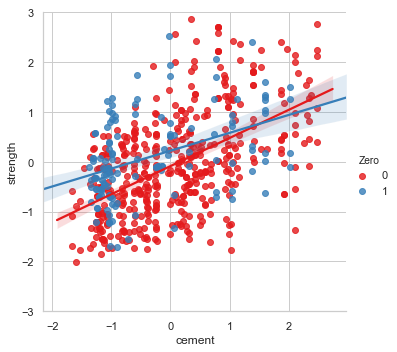

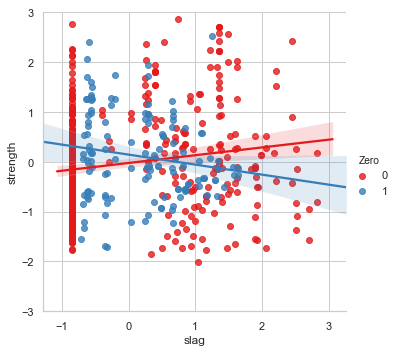

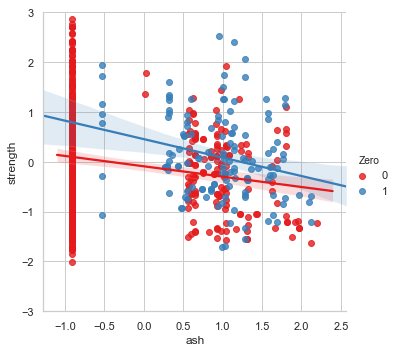

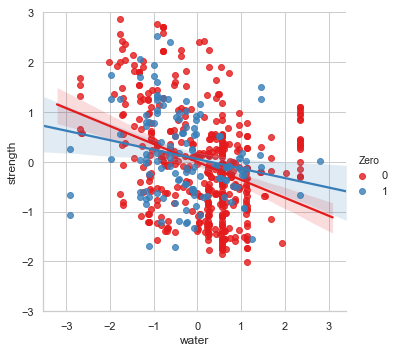

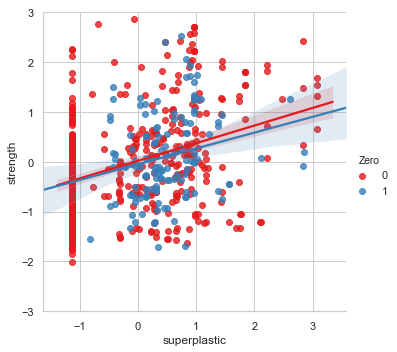

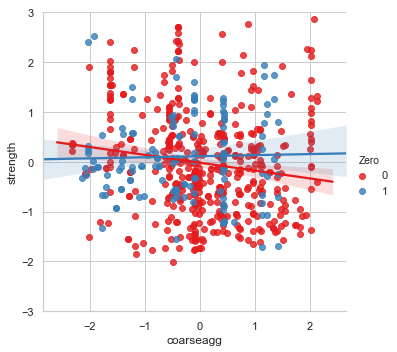

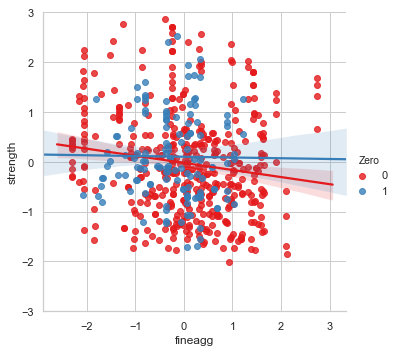

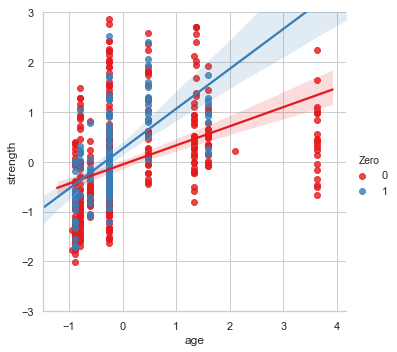

In [49]:
y_train_z = (y_train_clean-y_train_clean.mean())/y_train_clean.std()
df_cluster_0['strength'] = y_train_z.reset_index(drop=True)
for col in df_cluster_0.iloc[:, 0:8]:
    plot = sns.lmplot(col,'strength',data=df_cluster_0, hue='Zero')
    plot.set(ylim = (-3,3))

* Both clusters appear to be part of same gaussian
* Out of all the attributes Coarse Aggregate & Fine Aggregate seems to be the least contributing feature, as regression plots for both clusters seems to be almost horizontal

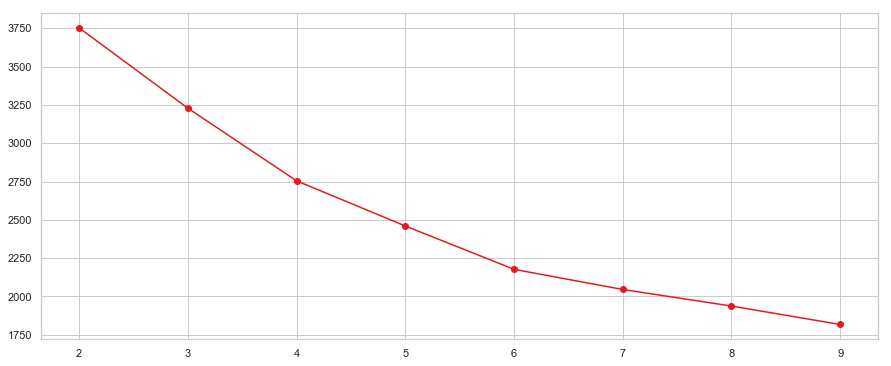

In [50]:
from sklearn.cluster import KMeans

X_train_clean_z = X_train_clean.apply(zscore)
cluster_range = range(2, 10)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(X_train_clean_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors})
plt.figure(figsize=(15,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Grouped 4 cluster boxplots


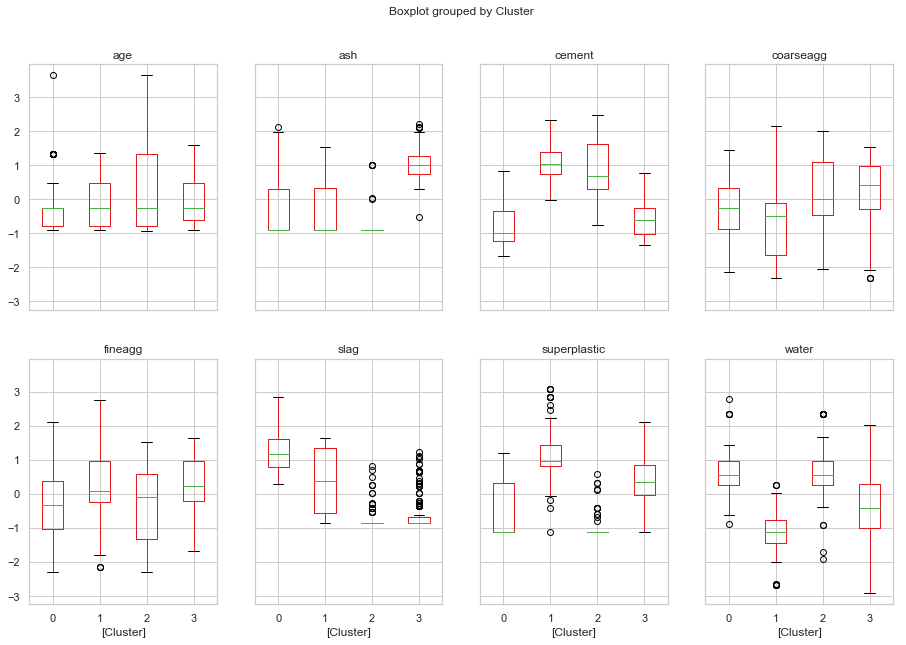

In [51]:
cluster = KMeans(n_clusters = 4, random_state = 1)
cluster.fit(X_train_clean_z)

cluster_prediction=cluster.predict(X_train_clean_z)
X_train_clean_z["Cluster"] = cluster_prediction
X_train_clean_z.boxplot(by = 'Cluster',  layout=(2,4), figsize=(15, 10))
print('Grouped 4 cluster boxplots')

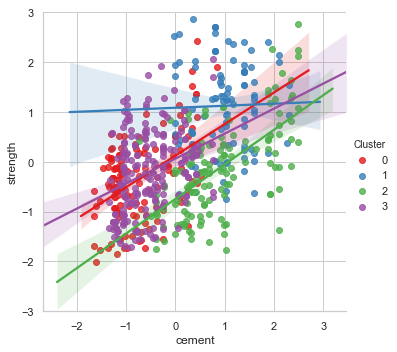

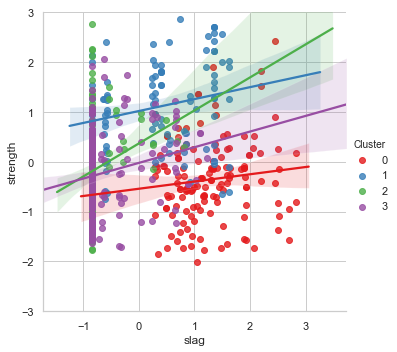

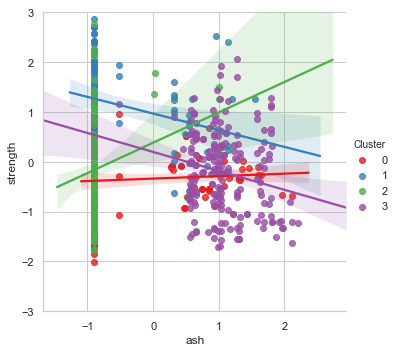

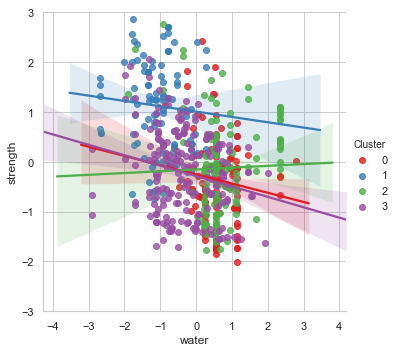

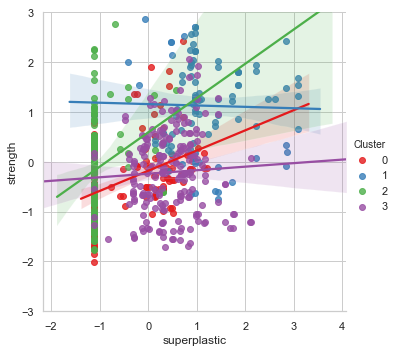

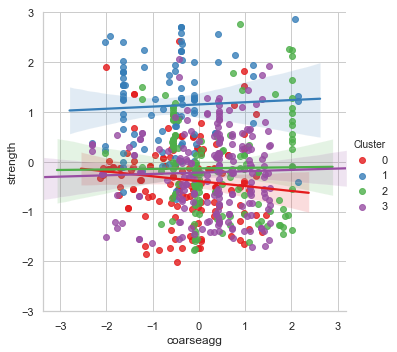

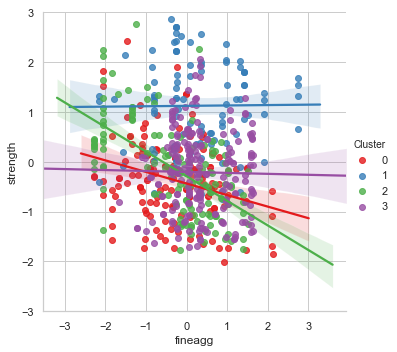

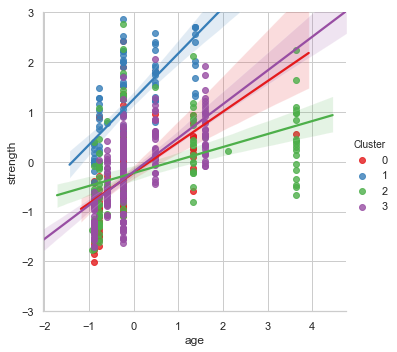

In [52]:
X_train_clean_z['strength'] = y_train_z.reset_index(drop=True)
for col in X_train_clean.iloc[:, 0:8]:
    plot = sns.lmplot(col,'strength',data=X_train_clean_z, hue='Cluster')
    plot.set(ylim = (-3,3))

* Data appears to be from same gaussian
* Out of all the attributes Coarse Aggregate seems to be the least contributing feature, as regression plots for all the 4 clusters seems to be almost horizontal
* Next is Fine Aggregate as it seems to be almost horizontal in 2 clusters

### Deliverable 3: Create the Model
#### Obtain feature importance for the individual features and present your findings

 DT 
 *******************************************************
In-sample     R2: 0.9988 | Adj. R2: 0.9988 | RMSE: 0.57 | ρ: 0.9994
Out of sample R2: 0.8391 | Adj. R2: 0.8323 | RMSE: 6.99 | ρ: 0.9201


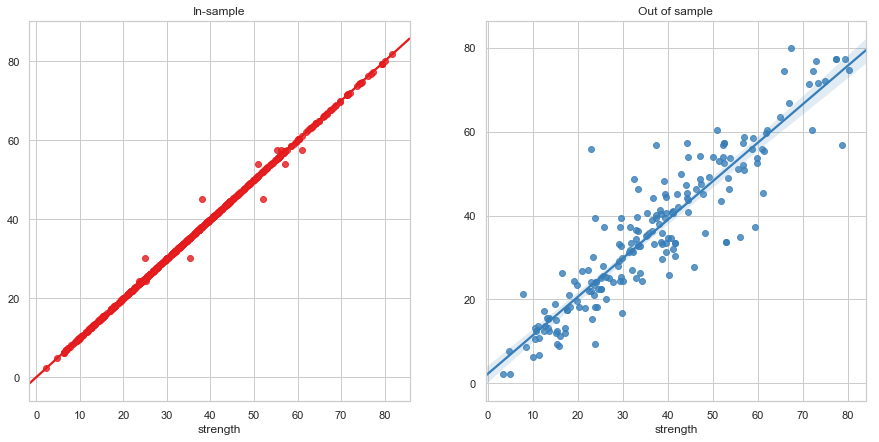

In [53]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(random_state=0)
DT_regressor.fit(X_train_clean, y_train_clean)
results('DT', DT_regressor, X_train_clean, y_train_clean, X_valid_clean, y_valid_clean)

cement       age      slag     water  superplastic  coarseagg  \
Importance  0.394684  0.303665  0.114783  0.109845      0.028308   0.025868   

             fineagg       ash  
Importance  0.013072  0.009775

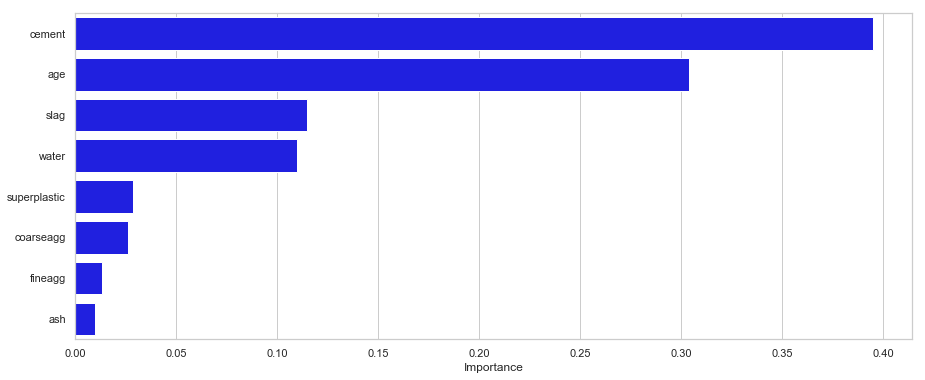

In [54]:
df_importance = pd.DataFrame(DT_regressor.feature_importances_, columns = ["Importance"], index = X_train_clean.columns).sort_values(by = "Importance", ascending=False)
plt.figure(figsize=(15, 6))
sns.barplot(x = df_importance["Importance"], y = df_importance.index, orient='h', color = "blue")
df_importance.T

In [55]:
Model_name = 'DT KCV'
Kfold(Model_name, DT_regressor, X_CV_clean, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      81.48 ±16.87
RMSE      6.87 ±2.52
Name: DT KCV, dtype: object

 DT_FS 
 *******************************************************
In-sample     R2: 0.9964 | Adj. R2: 0.9964 | RMSE: 0.97 | ρ: 0.9982
Out of sample R2: 0.8415 | Adj. R2: 0.8382 | RMSE: 6.94 | ρ: 0.9205


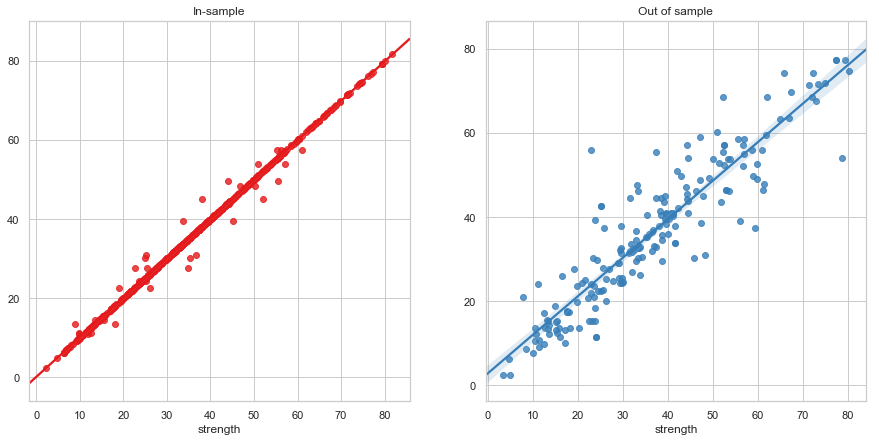

In [56]:
drop_col = ['superplastic', 'coarseagg', 'fineagg', 'ash']
X_train_FS = X_train_clean.drop(columns = drop_col)
X_valid_FS = X_valid_clean.drop(columns = drop_col)
DT_regressor = DecisionTreeRegressor(random_state=0)
DT_regressor.fit(X_train_FS, y_train_clean)
results('DT_FS', DT_regressor, X_train_FS, y_train_clean, X_valid_FS, y_valid_clean)

In [57]:
Model_name = 'DT_FS KCV'
Kfold(Model_name, DT_regressor, X_CV_clean.drop(columns = drop_col), y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      81.12 ±13.45
RMSE      6.96 ±2.04
Name: DT_FS KCV, dtype: object

 XGB 
 *******************************************************
In-sample     R2: 0.9533 | Adj. R2: 0.9527 | RMSE: 3.52 | ρ: 0.9772
Out of sample R2: 0.9098 | Adj. R2: 0.906 | RMSE: 5.23 | ρ: 0.956


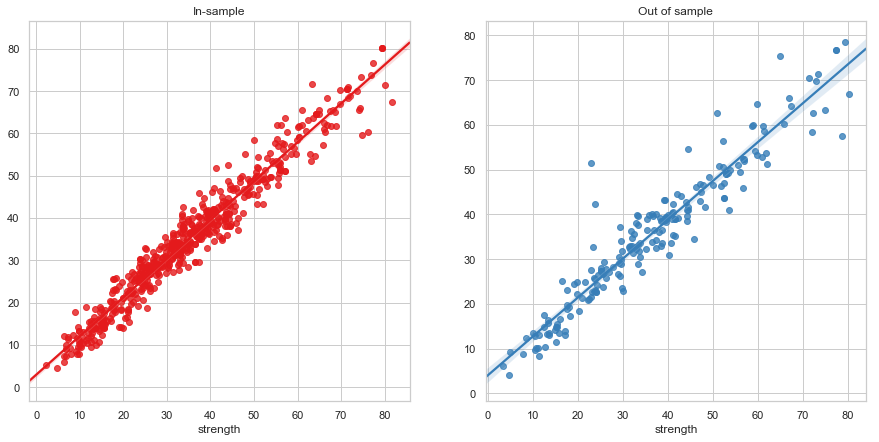

In [58]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor(random_state=1, silent=True)
XGB_model.fit(X_train_clean, y_train_clean)
y_predict_train = XGB_model.predict(X_train_clean)
results('XGB', XGB_model, X_train_clean, y_train_clean, X_valid_clean, y_valid_clean)

In [59]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(XGB_model)
shap_values = explainer.shap_values(X_train_clean)
i = 25
print('y:', y_train_clean.iloc[i], '| ŷ:', y_predict_train[i])
shap.force_plot(explainer.expected_value, shap_values[i,:], X_train_clean.iloc[i,:])

y: 31.45 | ŷ: 31.447872


In [60]:
shap.force_plot(explainer.expected_value, shap_values, X_train_clean)

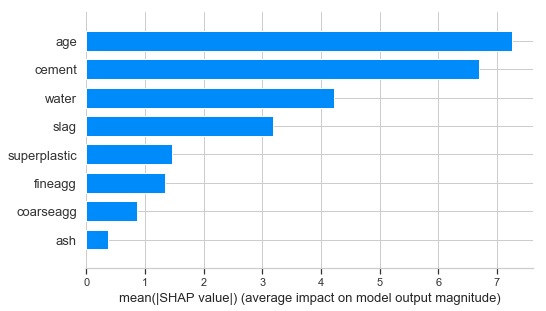

In [61]:
shap.summary_plot(shap_values, X_train_clean, plot_type="bar")

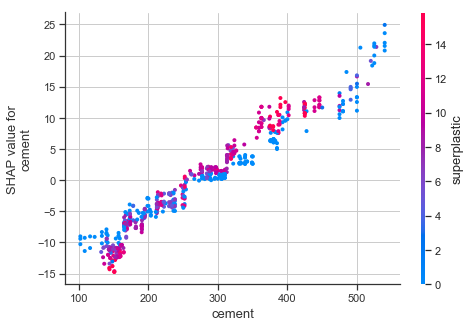

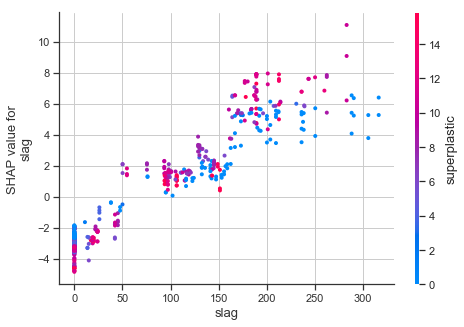

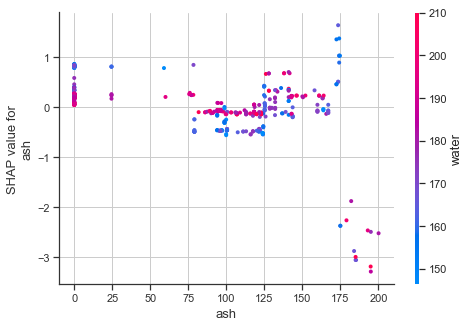

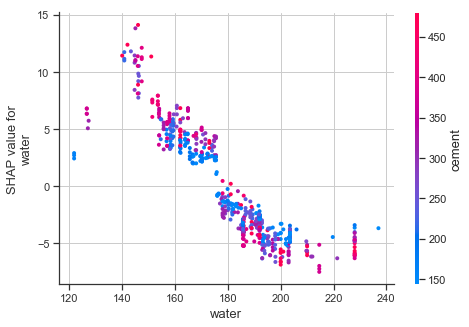

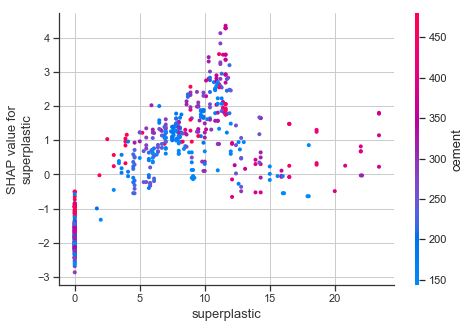

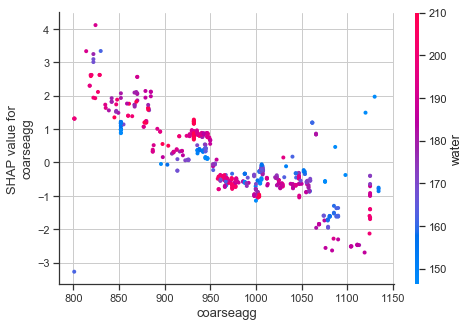

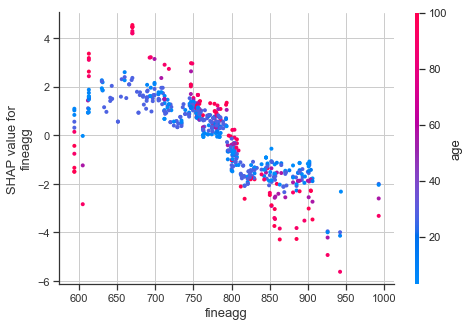

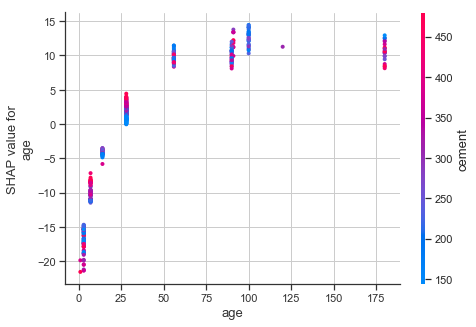

In [62]:
for col in X_train_clean.columns:
    shap.dependence_plot(col, shap_values, X_train_clean)

In [63]:
Model_name = 'XGB KCV'
Kfold(Model_name, XGB_model, X_CV_clean, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      89.35 ±5.55
RMSE      5.3 ±1.23
Name: XGB KCV, dtype: object

 XGB_FS 
 *******************************************************
In-sample     R2: 0.9478 | Adj. R2: 0.9472 | RMSE: 3.7 | ρ: 0.9743
Out of sample R2: 0.9118 | Adj. R2: 0.9087 | RMSE: 5.22 | ρ: 0.9572


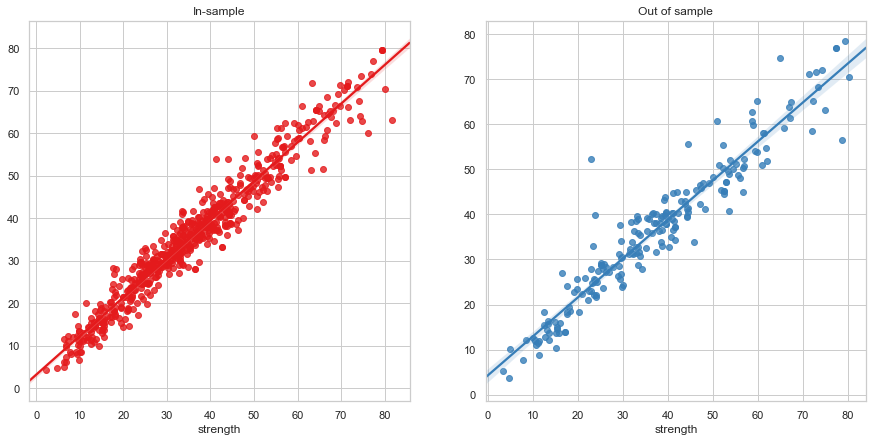

In [64]:
drop_col = ['coarseagg']#'fineagg', 'coarseagg'
X_train_FS = X_train.drop(columns = drop_col)
X_valid_FS = X_valid.drop(columns = drop_col)
XGB_model.fit(X_train_FS, y_train)
results('XGB_FS', XGB_model, X_train_FS, y_train, X_valid_FS, y_valid)

In [65]:
Model_name = 'XGB_FS KCV'
Kfold(Model_name, XGB_model, X_CV.drop(columns = drop_col), y_CV)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      89.75 ±4.55
RMSE     5.22 ±1.29
Name: XGB_FS KCV, dtype: object

 RF 
 *******************************************************
In-sample     R2: 0.9835 | Adj. R2: 0.9833 | RMSE: 2.09 | ρ: 0.993
Out of sample R2: 0.903 | Adj. R2: 0.8989 | RMSE: 5.43 | ρ: 0.9523


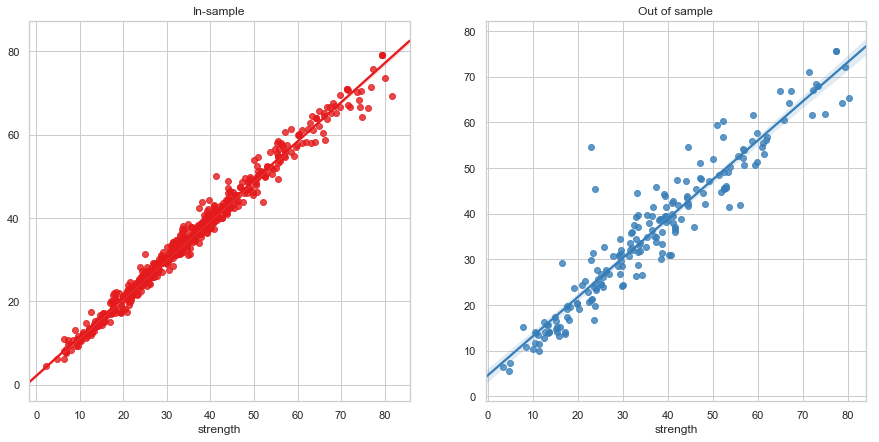

In [66]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
RF_regressor.fit(X_train_clean, y_train_clean)
results('RF', RF_regressor, X_train_clean, y_train_clean, X_valid_clean, y_valid_clean)

cement       age     water      slag  superplastic   fineagg  \
Importance  0.328857  0.325408  0.116073  0.076518      0.064581  0.038118   

            coarseagg       ash  
Importance    0.03049  0.019956

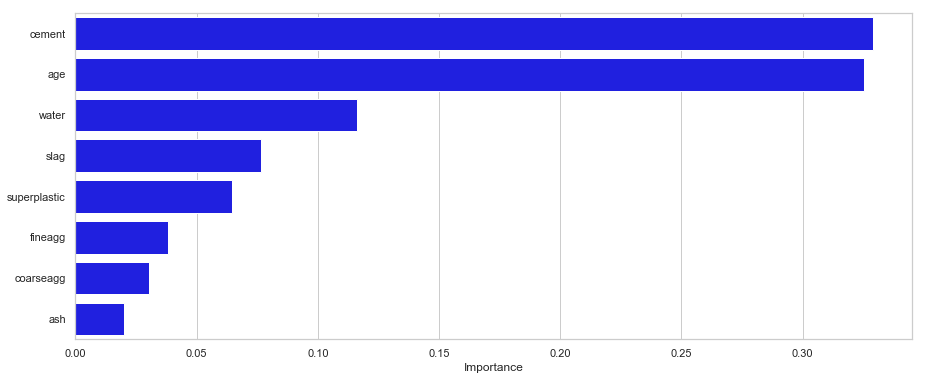

In [67]:
df_importance = pd.DataFrame(RF_regressor.feature_importances_, columns = ["Importance"], index = X_train_clean.columns).sort_values(by = "Importance", ascending=False)
plt.figure(figsize=(15, 6))
sns.barplot(x = df_importance["Importance"], y = df_importance.index, orient='h', color = "blue")
df_importance.T

In [68]:
Model_name = 'RF KCV'
Kfold(Model_name, RF_regressor, X_CV_clean, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      89.0 ±8.94
RMSE    5.32 ±1.81
Name: RF KCV, dtype: object

 RF_FS 
 *******************************************************
In-sample     R2: 0.9831 | Adj. R2: 0.9829 | RMSE: 2.12 | ρ: 0.9927
Out of sample R2: 0.9083 | Adj. R2: 0.9049 | RMSE: 5.28 | ρ: 0.955


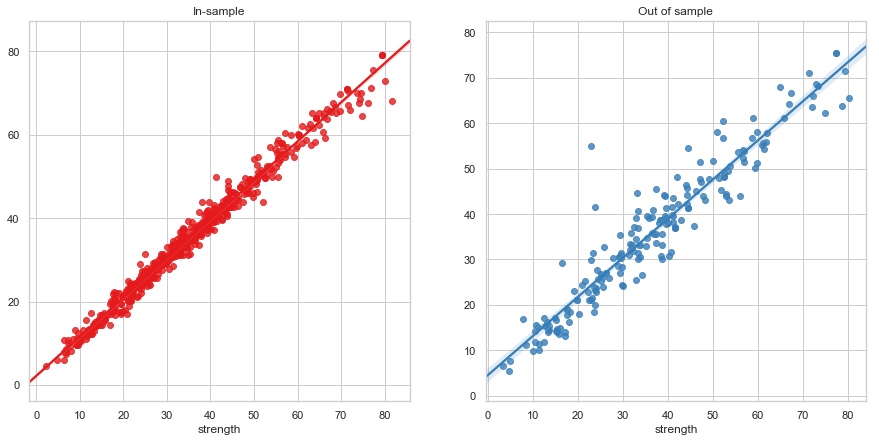

In [69]:
drop_col = ['coarseagg']
X_train_FS = X_train_clean.drop(columns = drop_col)
X_valid_FS = X_valid_clean.drop(columns = drop_col)
RF_regressor.fit(X_train_FS, y_train_clean)
results('RF_FS', RF_regressor, X_train_FS, y_train_clean, X_valid_FS, y_valid_clean)

In [70]:
Model_name = 'RF_FS KCV'
Kfold(Model_name, RF_regressor, X_CV_clean.drop(columns = drop_col), y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      89.04 ±8.1
RMSE    5.33 ±1.61
Name: RF_FS KCV, dtype: object

 GBM 
 *******************************************************
In-sample     R2: 0.9552 | Adj. R2: 0.9546 | RMSE: 3.44 | ρ: 0.9781
Out of sample R2: 0.9075 | Adj. R2: 0.9036 | RMSE: 5.3 | ρ: 0.9546


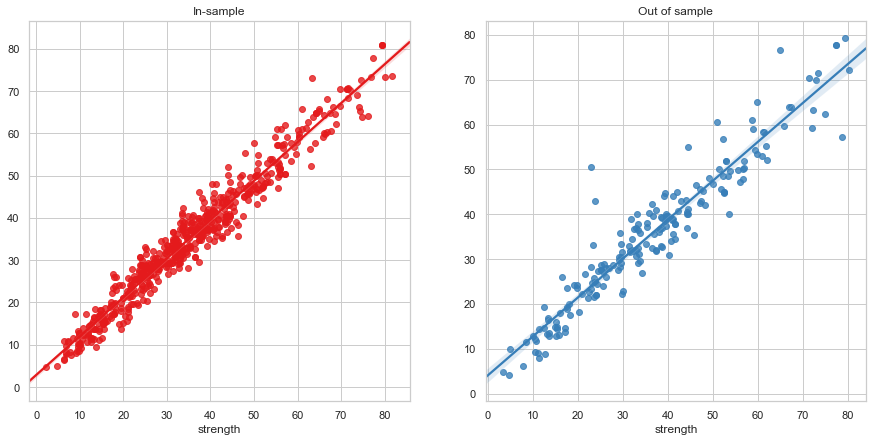

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
GB_model = GradientBoostingRegressor(n_estimators=100, random_state=10)
GB_model.fit(X_train_clean, y_train_clean)
results('GBM', GB_model, X_train_clean, y_train_clean, X_valid_clean, y_valid_clean)

In [72]:
Model_name = 'GBM KCV'
Kfold(Model_name, GB_model, X_CV_clean, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      89.22 ±5.42
RMSE     5.33 ±1.12
Name: GBM KCV, dtype: object

 GBM_FS 
 *******************************************************
In-sample     R2: 0.9496 | Adj. R2: 0.9491 | RMSE: 3.65 | ρ: 0.9752
Out of sample R2: 0.9121 | Adj. R2: 0.9093 | RMSE: 5.16 | ρ: 0.9571


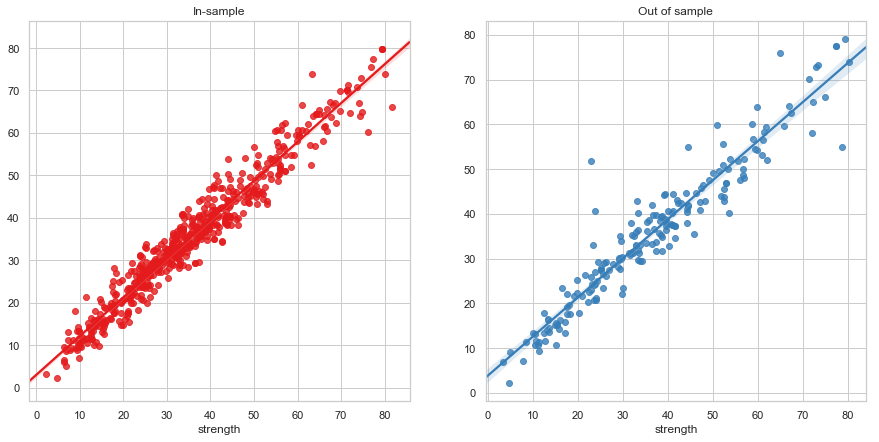

In [73]:
drop_col = ['fineagg', 'coarseagg']
X_train_FS = X_train_clean.drop(columns = drop_col)
X_valid_FS = X_valid_clean.drop(columns = drop_col)
GB_model.fit(X_train_FS, y_train_clean)
results('GBM_FS', GB_model, X_train_FS, y_train_clean, X_valid_FS, y_valid_clean)

In [74]:
Model_name = 'GBM_FS KCV'
Kfold(Model_name, GB_model, X_CV.drop(columns = drop_col), y_CV)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      89.54 ±5.35
RMSE      5.26 ±1.4
Name: GBM_FS KCV, dtype: object

 BAgg 
 *******************************************************
In-sample     R2: 0.9848 | Adj. R2: 0.9846 | RMSE: 2.01 | ρ: 0.9936
Out of sample R2: 0.9053 | Adj. R2: 0.9013 | RMSE: 5.36 | ρ: 0.9533
Out of bag score 0.8905


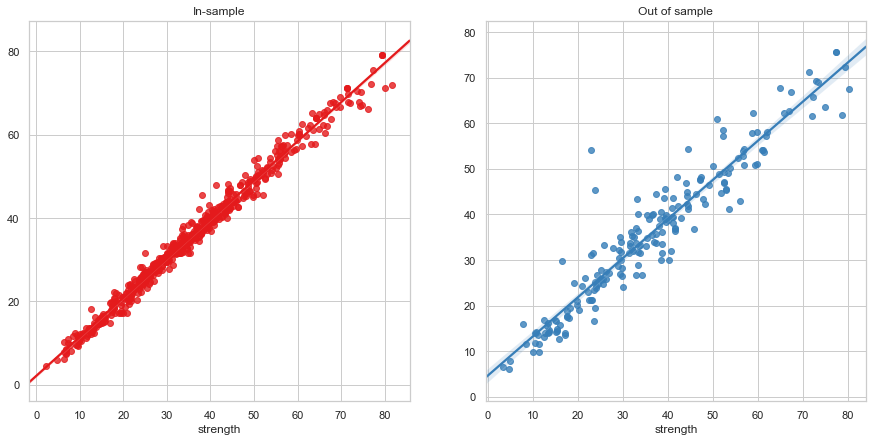

In [75]:
from sklearn.ensemble import BaggingRegressor
BR_model = BaggingRegressor(n_estimators=100, oob_score=True, random_state=1, n_jobs = -2)
BR_model.fit(X_train_clean, y_train_clean)
results('BAgg', BR_model, X_train_clean, y_train_clean, X_valid_clean, y_valid_clean)
print('Out of bag score', round(BR_model.oob_score_,4))

In [76]:
Model_name = 'BAgg KCV'
Kfold(Model_name, BR_model, X_CV_clean, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      89.12 ±8.94
RMSE     5.29 ±1.81
Name: BAgg KCV, dtype: object

 BAgg_FS 
 *******************************************************
In-sample     R2: 0.983 | Adj. R2: 0.9829 | RMSE: 2.11 | ρ: 0.9923
Out of sample R2: 0.9083 | Adj. R2: 0.906 | RMSE: 5.32 | ρ: 0.9553
Out of bag score 0.8861


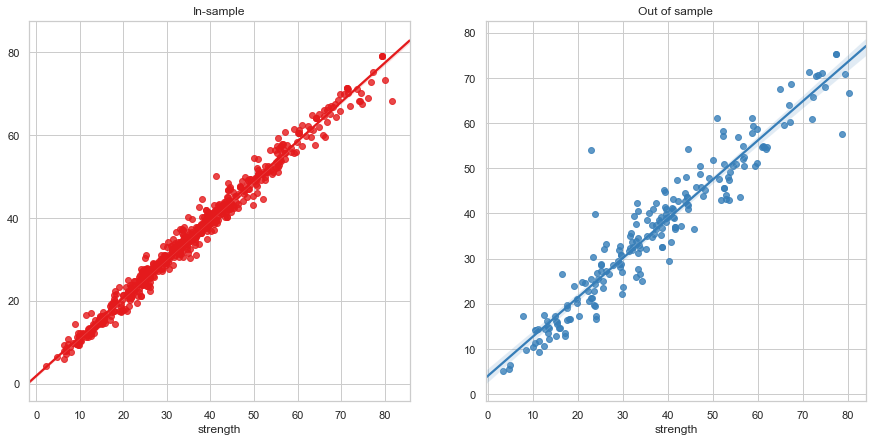

In [77]:
drop_col = ['fineagg', 'ash', 'coarseagg']
X_train_FS = X_train.drop(columns = drop_col)
X_valid_FS = X_valid.drop(columns = drop_col)
BR_model.fit(X_train_FS, y_train)
results('BAgg_FS', BR_model, X_train_FS, y_train, X_valid_FS, y_valid)
print('Out of bag score', round(BR_model.oob_score_,4))

In [78]:
Model_name = 'BAgg_FS KCV'
Kfold(Model_name, BR_model, X_CV.drop(columns = drop_col), y_CV)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      90.09 ±4.67
RMSE      5.11 ±1.1
Name: BAgg_FS KCV, dtype: object

 KNN 
 *******************************************************
In-sample     R2: 0.9988 | Adj. R2: 0.9988 | RMSE: 0.57 | ρ: 0.9994
Out of sample R2: 0.78 | Adj. R2: 0.7706 | RMSE: 8.17 | ρ: 0.8845


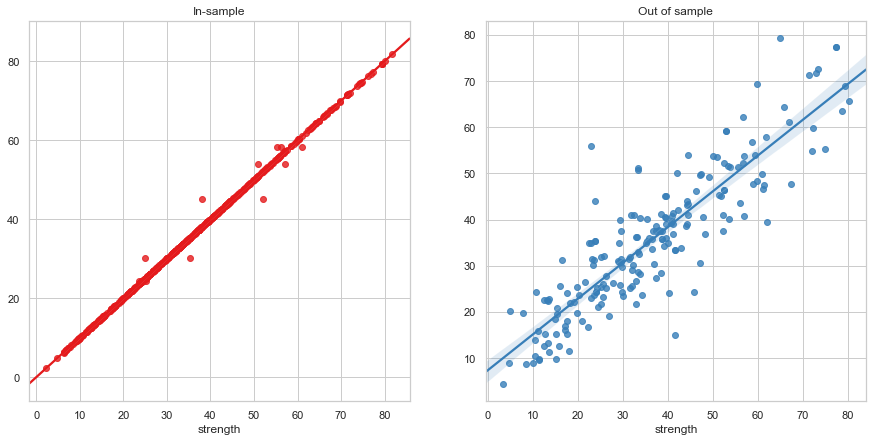

In [79]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors= 2, weights = 'distance' )
KNN_model.fit(X_train_z, y_train_clean)
results('KNN', KNN_model, X_train_z, y_train_clean, X_valid_z, y_valid_clean)

In [80]:
Model_name = 'KNN KCV'
X_CV_z = pd.DataFrame(data=X_CV_z[0:,0:], index=[i for i in range(len(X_CV_z))], columns=[i for i in X_CV_clean.columns])
Kfold(Model_name, KNN_model, X_CV_z, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      74.41 ±14.98
RMSE       8.14 ±1.4
Name: KNN KCV, dtype: object

 SVM 
 *******************************************************
In-sample     R2: 0.6795 | Adj. R2: 0.675 | RMSE: 9.21 | ρ: 0.8261
Out of sample R2: 0.7422 | Adj. R2: 0.7312 | RMSE: 8.85 | ρ: 0.8725


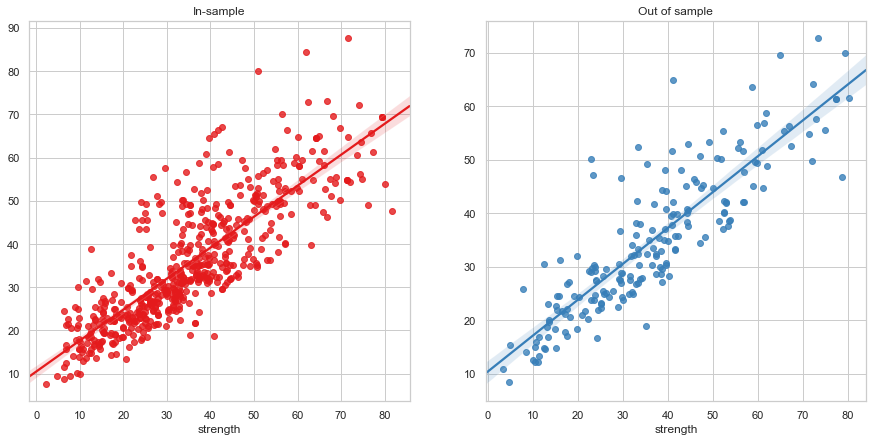

In [81]:
from sklearn import svm
SVM_model = svm.SVR(kernel='linear')  
SVM_model.fit(X_train_clean, y_train_clean)
results('SVM', SVM_model, X_train_clean, y_train_clean, X_valid_clean, y_valid_clean)

In [82]:
Model_name = 'SVM KCV'
Kfold(Model_name, SVM_model, X_CV_clean, y_CV_clean)
df_Accuracy_Score_F.set_index('Metrics')[Model_name]

Metrics
R2      67.28 ±17.57
RMSE      9.24 ±2.08
Name: SVM KCV, dtype: object

* Important features are 'cement', 'slag', 'age', 'water' & 'superplastic'

### Deliverable 4: Tuning the model
#### Algorithms that you think will be suitable for this project

LR_Deg_1  LR_Deg_1 KCV  Ridge_Deg_1  Ridge_Deg_1 KCV  Lasso_Deg_1  \
Metrics                                                                      
R2         0.7278       0.67912       0.7284          0.68088       0.7281   
RMSE       9.0900       9.17500       9.0800          9.14700       9.0900   

         Lasso_Deg_1 KCV  LR_PCA  LR_PCA KCV  LR_Deg_2  LR_Deg_2 KCV  ...  \
Metrics                                                               ...   
R2               0.68095  0.7095     0.66094    0.7916        0.7364  ...   
RMSE             9.14700  9.3900     9.44400    7.9500        8.2840  ...   

         GBM_FS  GBM_FS KCV    BAgg  BAgg KCV  BAgg_FS  BAgg_FS KCV   KNN  \
Metrics                                                                     
R2       0.9121     0.89542  0.9053   0.89121   0.9083      0.90089  0.78   
RMSE     5.1600     5.25500  5.3600   5.28900   5.3200      5.10800  8.17   

         KNN KCV     SVM  SVM KCV  
Metrics                            
R2       0.74406  0.7422  0.67283  
RMSE     8.14200  8.8500  9.23600  

[2 rows x 44 columns]

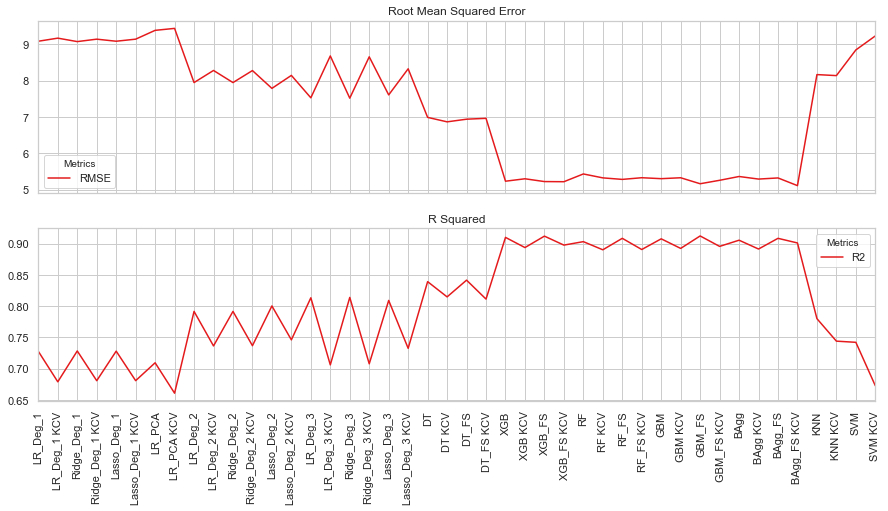

In [83]:
df_Scores_CV_R2_Mean = df_Accuracy_Score[df_Accuracy_Score['Metrics'] == 'R2'].set_index('Metrics')
df_Scores_CV_RMSE_Mean = df_Accuracy_Score[df_Accuracy_Score['Metrics'] == 'RMSE'].set_index('Metrics')

f, ax = plt.subplots(2, 1, sharex = True, figsize = (15, 7))
df_Scores_CV_R2_Mean.T.plot(kind='line', ax = ax[1])
df_Scores_CV_RMSE_Mean.T.plot(kind='line', ax = ax[0])
ax[1].set_xticks(np.arange(0, 44, 1))
ax[1].set_xticklabels(labels = df_Scores_CV_RMSE_Mean.columns, rotation=90)#[1:].tolist()
ax[1].title.set_text('R Squared')
ax[0].title.set_text('Root Mean Squared Error')
df_Accuracy_Score.set_index('Metrics')

DT   DT_FS     XGB  XGB_FS      RF   RF_FS     GBM  GBM_FS  \
Metrics                                                                   
R2       0.8391  0.8415  0.9098  0.9118  0.9030  0.9083  0.9075  0.9121   
Adj. R2  0.8323  0.8382  0.9060  0.9087  0.8989  0.9049  0.9036  0.9093   
RMSE     6.9900  6.9400  5.2300  5.2200  5.4300  5.2800  5.3000  5.1600   
ρ        0.9201  0.9205  0.9560  0.9572  0.9523  0.9550  0.9546  0.9571   

           BAgg  BAgg_FS     KNN     SVM  
Metrics                                   
R2       0.9053   0.9083  0.7800  0.7422  
Adj. R2  0.9013   0.9060  0.7706  0.7312  
RMSE     5.3600   5.3200  8.1700  8.8500  
ρ        0.9533   0.9553  0.8845  0.8725

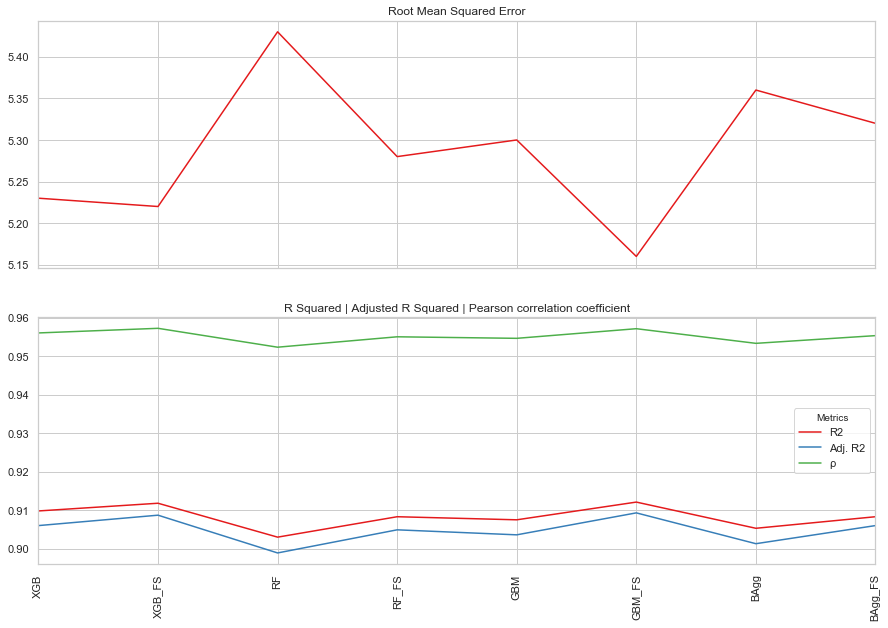

In [84]:
f, ax = plt.subplots(2, 1, sharex = True, figsize = (15, 10))
df_Score.set_index('Metrics').iloc[:, 12:20].T.drop('RMSE', axis = 1).plot(grid=True, ax = ax[1])
ax[1].set_xticks(np.arange(0, 8, 1))
ax[1].set_xticklabels(labels = df_Score.T.index[13:21].tolist(), rotation=90)
ax[1].title.set_text('R Squared | Adjusted R Squared | Pearson correlation coefficient')
df_Scores = pd.DataFrame(df_Score.iloc[2].values[13:21].tolist(), columns = ["RMSE"], index = df_Score.columns[13:21])
df_Scores['RMSE'].T.plot(ax = ax[0])
ax[0].title.set_text('Root Mean Squared Error')
df_Score.set_index('Metrics').iloc[:, 10:]

* Ploting only models that socred 𝑅2 above 0.90 for better scale

XGB KCV   XGB_FS KCV      RF KCV   RF_FS KCV      GBM KCV  \
Metrics                                                                  
R2       89.35 ±5.55  89.75 ±4.55  89.0 ±8.94  89.04 ±8.1  89.22 ±5.42   
RMSE       5.3 ±1.23   5.22 ±1.29  5.32 ±1.81  5.33 ±1.61   5.33 ±1.12   

          GBM_FS KCV     BAgg KCV  BAgg_FS KCV  
Metrics                                         
R2       89.54 ±5.35  89.12 ±8.94  90.09 ±4.67  
RMSE       5.26 ±1.4   5.29 ±1.81    5.11 ±1.1

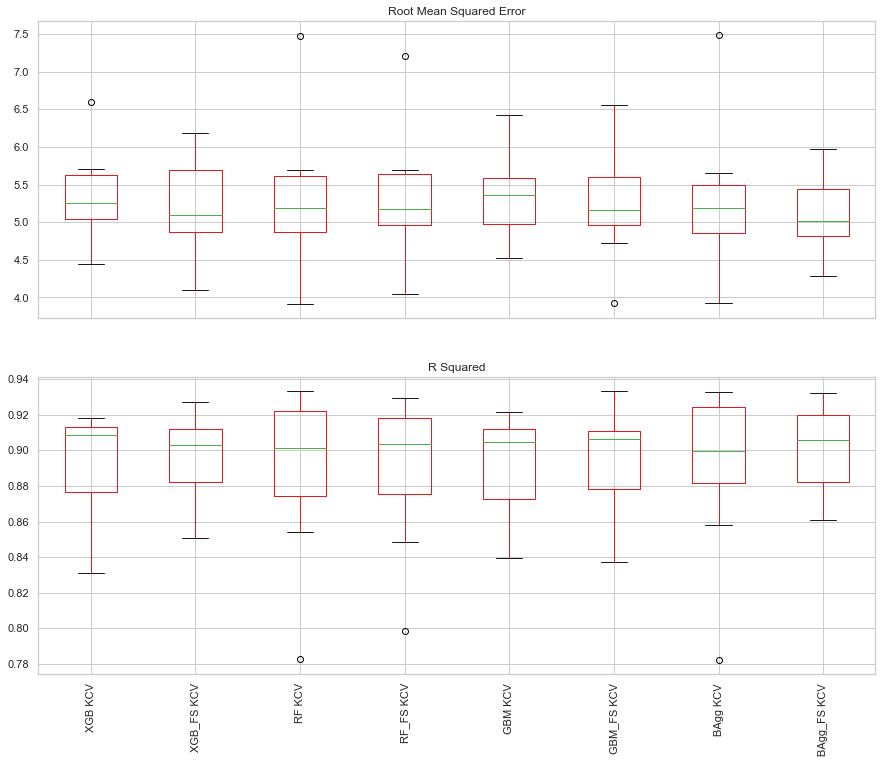

In [85]:
df_Scores_CV_R2 = df_Scores_CV[df_Scores_CV['Metrics'] == 'R2'].iloc[:, 13:21]
df_Scores_CV_RMSE = df_Scores_CV[df_Scores_CV['Metrics'] == 'RMSE'].iloc[:, 13:21]

f, ax = plt.subplots(2, 1, sharex = True, figsize = (15, 12))
df_Scores_CV_RMSE.plot(kind='box', ax = ax[0])
ax[0].title.set_text('Root Mean Squared Error')
df_Scores_CV_R2.plot(kind='box', ax = ax[1])
ax[1].title.set_text('R Squared')
plt.xticks(rotation=90)
df_Scores_CV_Mean_F.set_index('Metrics').iloc[:, 12:20]

__Below three algorithms appears to be promising, based on the KFold Cross validation results of all the models built till now__

XGBoost Regressor with feature selection (dropped column 'coarseagg') with outliers
* Validation Results: $R^2$: 91.18 | $Adjusted R^2$: 90.87 | $RMSE$: 5.22 | $ρ$: 95.72
* KFold CV Results:   $R^2$: 85.2 - 94.3 (89.75 ±4.55) | $RMSE$: 3.93 - 6.51 (5.22 ±1.29)

Gradient Boosting Regressor with feature selection (dropped column 'fineagg', 'coarseagg') without outliers gave best results in training but with outliers performed better during KFold CV
* Validation Results: $R^2$: 91.21 | $Adjusted R^2$: 90.93 | $RMSE$: 5.16 | $ρ$: 95.71
* KFold CV Results:   $R^2$: 84.19 - 94.89 (89.54 ±5.35) | $RMSE$: 3.86 - 6.66 (5.26 ±1.4)

Bagging Regressor with feature selection (dropped column 'fineagg', 'ash', 'coarseagg') with outliers gave best results during KFold CV
* Validation Results: $R^2$: 90.83 | $Adjusted R^2$: 90.60 | $RMSE$: 5.3200 | $ρ$: 95.53
* KFold CV Results:   $R^2$: 85.42 - 94.76 (90.09 ±4.67) | $RMSE$: 4.01 - 6.21 (5.11 ±1.1)

#### Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit
##### XGBoost Regressor

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

drop_col = ['coarseagg']
X_train_XGBFS = X_train.drop(columns = drop_col)
X_valid_XGBFS = X_valid.drop(columns = drop_col)
X_test_XGBFS = X_test.drop(columns = drop_col)

# print(' XGB Regressor Hyperparameters', "\n", '*'*55)
# XGBRegressor().get_params()

In [87]:
# pipeline_XGB = Pipeline([('scaler',StandardScaler()),
#                          ('model', XGBRegressor(n_jobs = -2, silent=True))])
# param_dist = {
#             'model__colsample_bytree': [0.7, 1.1],
#             'model__gamma' : sp_randint(0, 5),
#             'model__learning_rate': [0.1, 0.3],
#             'model__max_depth': sp_randint(2, 12),
#             'model__min_child_weight': sp_randint(1, 15),
#             'model__n_estimators': sp_randint(50, 500),
#             'model__subsample': [0.7, 1.1]
#              }
# RandomCV = RandomizedSearchCV(pipeline_XGB, param_distributions=param_dist, n_iter=10, cv = 10)
# RandomCV.fit(X_train_XGBFS, y_train) 

# print(' XGBoost', "\n", '*'*55)
# print(' First Training: Training 𝑅2 94.78 | Validation 𝑅2 91.18')
# print(' Hyper Tuning:   Training 𝑅2', round(RandomCV.score(X_train_XGBFS, y_train),4), '| Validation 𝑅2', round(RandomCV.score(X_valid_XGBFS, y_valid),4))
# print(' Best Parameters:', RandomCV.best_params_)

In [88]:
pipeline_XGB = Pipeline([('scaler',StandardScaler()),
                         ('model', XGBRegressor(n_jobs = -2, silent=True, colsample_bytree = 0.7, gamma = 4,
                                                learning_rate = 0.1, max_depth = 7, min_child_weight = 7, 
                                                n_estimators = 350, subsample = 0.7, objective = 'reg:squarederror'))])
pipeline_XGB.fit(X_train_XGBFS,y_train)
#y_predict_XGB = pipeline_XGB.predict(X_train_clean)

print(' XGBoost', "\n", '*'*55)
print(' First Training: Training 𝑅2 94.78 | Validation 𝑅2 91.18')
print(' Hyper Tuning:   Training 𝑅2', round(pipeline_XGB.score(X_train_XGBFS, y_train)*100,2), '| Validation 𝑅2', round(pipeline_XGB.score(X_valid_XGBFS, y_valid)*100,2))

 XGBoost 
 *******************************************************
 First Training: Training 𝑅2 94.78 | Validation 𝑅2 91.18
 Hyper Tuning:   Training 𝑅2 99.34 | Validation 𝑅2 93.27


In [89]:
print(' Training Validation   𝑅2: 91.18')
print(' Hyperparameter Tuning 𝑅2: 93.27')
print(' Final Test            𝑅2:', round(pipeline_XGB.score(X_test_XGBFS, y_test)*100,2))

 Training Validation   𝑅2: 91.18
 Hyperparameter Tuning 𝑅2: 93.27
 Final Test            𝑅2: 93.26


XGBoost Regressor
* Score improved from Training Validation 𝑅2: 91.18 to Hyperparameter Tuning 𝑅2: 93.27 using RandomizedSearchCV
* Performance improved by 2.1% in Hyperparameter Tuning
* Final Test result using Test dataset gave an 𝑅2: 93.26

#####  Gradient Boosting Regressor

In [90]:
drop_col = ['fineagg', 'coarseagg']
X_train_GBRFS = X_train.drop(columns = drop_col)
X_valid_GBRFS = X_valid.drop(columns = drop_col)
X_test_GBRFS = X_test.drop(columns = drop_col)

# print(' Gradient Boosting Regressor Hyperparameters', "\n", '*'*55)
# GradientBoostingRegressor().get_params()

In [91]:
# pipeline_GBR = Pipeline([('scaler',StandardScaler()),
#                          ('model', GradientBoostingRegressor(random_state=10))])
# param_dist = {
#             'model__alpha': [0.7, 1.1],
#             'model__learning_rate': [0.1, 0.3],
#             'model__max_depth': sp_randint(2, 12),
#             'model__n_estimators': sp_randint(50, 500),
#             'model__min_samples_leaf': sp_randint(1, 3),
#             'model__subsample': [0.7, 1.1]
#              }
# RandomCV = RandomizedSearchCV(pipeline_GBR, param_distributions=param_dist, n_iter=10, cv = 10)
# RandomCV.fit(X_train_GBRFS,y_train)

# print(' Gradient Boost', "\n", '*'*55)
# print(' First Training: Training 𝑅2 94.96 | Validation 𝑅2 91.21')
# print(' Hyper Tuning:   Training 𝑅2', round(RandomCV.score(X_train_GBRFS, y_train)*100,2), '| Validation 𝑅2', round(RandomCV.score(X_valid_GBRFS, y_valid)*100,2))
# print(' Best Parameters:', RandomCV.best_params_)

In [92]:
pipeline_GBR = Pipeline([('scaler',StandardScaler()),
                         ('model', GradientBoostingRegressor(random_state=10, alpha = 0.7, learning_rate = 0.1, 
                                                             max_depth = 4, min_samples_leaf = 2,
                                                             n_estimators = 200, subsample = 0.7))])
pipeline_GBR.fit(X_train_GBRFS, y_train)
print(' Gradient Boost', "\n", '*'*55)
print(' First Training: Training 𝑅2 94.96 | Validation 𝑅2 91.21')
print(' Hyper Tuning:   Training 𝑅2', round(pipeline_GBR.score(X_train_GBRFS, y_train)*100,2), '| Validation 𝑅2', round(pipeline_GBR.score(X_valid_GBRFS, y_valid)*100,2))

 Gradient Boost 
 *******************************************************
 First Training: Training 𝑅2 94.96 | Validation 𝑅2 91.21
 Hyper Tuning:   Training 𝑅2 98.58 | Validation 𝑅2 93.36


In [93]:
print(' Training Validation   𝑅2: 91.21')
print(' Hyperparameter Tuning 𝑅2: 93.36')
print(' Final Test            𝑅2:', round(pipeline_GBR.score(X_test_GBRFS, y_test)*100,2))

 Training Validation   𝑅2: 91.21
 Hyperparameter Tuning 𝑅2: 93.36
 Final Test            𝑅2: 93.32


Gradient Boosting Regressor
* Score improved from Training Validation 𝑅2: 91.21 to Hyperparameter Tuning 𝑅2: 93.36 using RandomizedSearchCV
* Performance improved by 2.1% in Hyperparameter Tuning
* Final Test result using Test dataset gave an 𝑅2: 93.32

##### Bagging Regressor

In [94]:
X_train_BAgg = X_train_comb
X_valid_BAgg = X_valid_comb
X_test_BAgg = X_test_comb

# print(' Bagging Regressor Hyperparameters', "\n", '*'*55)
# BaggingRegressor().get_params()

In [95]:
# pipeline_BAgg = Pipeline([('scaler',StandardScaler()),
#                          ('model', BaggingRegressor(oob_score=True, random_state=1, n_jobs = -2))])
# param_dist = {
#             'model__n_estimators': sp_randint(10, 500)
#              }
# RandomCV = RandomizedSearchCV(pipeline_BAgg, param_distributions=param_dist, n_iter=10, cv = 10)
# RandomCV.fit(X_train_BAgg,y_train)

# print(' Bagging Regressor', "\n", '*'*55)
# print(' First Training: Training 𝑅2 98.3 | Validation 𝑅2 90.83')
# print(' Hyper Tuning:   Training 𝑅2', round(RandomCV.score(X_train_BAgg, y_train)*100,2), '| Validation 𝑅2', round(RandomCV.score(X_valid_BAgg, y_valid)*100,2))
# print(' Best Parameters:', RandomCV.best_params_)

In [96]:
pipeline_BAgg = Pipeline([('scaler',StandardScaler()),
                         ('model', BaggingRegressor(n_estimators = 109, oob_score=True, random_state=1, n_jobs = -2))])
pipeline_BAgg.fit(X_train_BAgg, y_train)
print(' Bagging Regressor', "\n", '*'*55)
print(' First Training: Training 𝑅2 98.3  | Validation 𝑅2 90.83')
print(' Hyper Tuning:   Training 𝑅2', round(pipeline_BAgg.score(X_train_BAgg, y_train)*100,2), '| Validation 𝑅2', round(pipeline_BAgg.score(X_valid_BAgg, y_valid)*100,2))

 Bagging Regressor 
 *******************************************************
 First Training: Training 𝑅2 98.3  | Validation 𝑅2 90.83
 Hyper Tuning:   Training 𝑅2 98.48 | Validation 𝑅2 90.94


In [97]:
print(' Training Validation   𝑅2: 90.83')
print(' Hyperparameter Tuning 𝑅2: 90.94')
print(' Final Test            𝑅2:', round(pipeline_BAgg.score(X_test_BAgg, y_test)*100,2))

 Training Validation   𝑅2: 90.83
 Hyperparameter Tuning 𝑅2: 90.94
 Final Test            𝑅2: 91.11


Bagging Regressor
* Score improved from Training Validation 𝑅2: 90.83 to Hyperparameter Tuning 𝑅2: 90.94
* Performance improved after combining Coarse Aggregate & Fine Aggregate to create a composite feature and by RandomizedSearchCV
* A performance improvement of 0.11% in Hyperparameter Tuning was observed
* Final Test result using Test dataset gave an 𝑅2: 91.11

#### Model performance range at 95% confidence level

In [98]:
global df_CV, df_CV_F
df_CV, df_CV_F = pd.DataFrame(), pd.DataFrame()
def Final_Kfold(Model, model, X, y):
    X, y = X.to_numpy(), np.array(y)
    Metrics, Score, Mean_Score, Confidence_Score = [], [], [], []
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_predict_test = model.predict(X_test)
        R2 = round(r2_score(y_test, y_predict_test),4)
        RMSE = round(np.sqrt(mean_squared_error(y_test, y_predict_test)),2)
        Metrics.extend(['R2', 'RMSE'])
        Score.extend([R2, RMSE])
    df_CV['Metrics'], df_CV[Model] = Metrics, Score
    Mean_Score.append(df_CV[df_CV['Metrics'] == 'R2'][Model].mean())
    Confidence_Score.append((str(round((df_CV[df_CV['Metrics'] == 'R2'][Model].mean())*100, 2))) + (' ±'+ str(round((df_CV[df_CV['Metrics'] == 'R2'][Model].std()) * 196, 2))))
    Mean_Score.append(df_CV[df_CV['Metrics'] == 'RMSE'][Model].mean())
    Confidence_Score.append((str(round((df_CV[df_CV['Metrics'] == 'RMSE'][Model].mean()), 2))) + (' ±'+ str(round((df_CV[df_CV['Metrics'] == 'RMSE'][Model].std()) * 1.96, 2))))
    Metrics = ['R2', 'RMSE']
    df_CV_F['Metrics'], df_CV_F[Model] = Metrics, Confidence_Score

In [99]:
Model_name = 'XGB_Final KCV'
XGB_model = XGBRegressor(n_jobs = -2, silent=True, colsample_bytree = 0.7, gamma = 4,
                                                learning_rate = 0.1, max_depth = 7, min_child_weight = 7, 
                                                n_estimators = 350, subsample = 0.7, objective = 'reg:squarederror')
drop_col = ['coarseagg']
Final_Kfold(Model_name, XGB_model, X_CV.drop(columns = drop_col), y_CV)

In [100]:
Model_name = 'GBM_Final KCV'
GBM_model = GradientBoostingRegressor(random_state=10, alpha = 0.7, learning_rate = 0.1, 
                                                             max_depth = 4, min_samples_leaf = 2,
                                                             n_estimators = 200, subsample = 0.7)
drop_col = ['fineagg', 'coarseagg']
Final_Kfold(Model_name, GBM_model, X_CV.drop(columns = drop_col), y_CV)

In [101]:
Model_name = 'BAgg_Final KCV'
BAgg_model = BaggingRegressor(n_estimators = 109, oob_score=True, random_state=1, n_jobs = -2)
Final_Kfold(Model_name, BAgg_model, X_CV_comb, y_CV)

XGB_Final KCV GBM_Final KCV BAgg_Final KCV
Metrics                                           
R2         93.3 ±4.97   92.62 ±4.77    90.65 ±4.86
RMSE       4.17 ±1.43    4.39 ±1.45      4.95 ±1.1

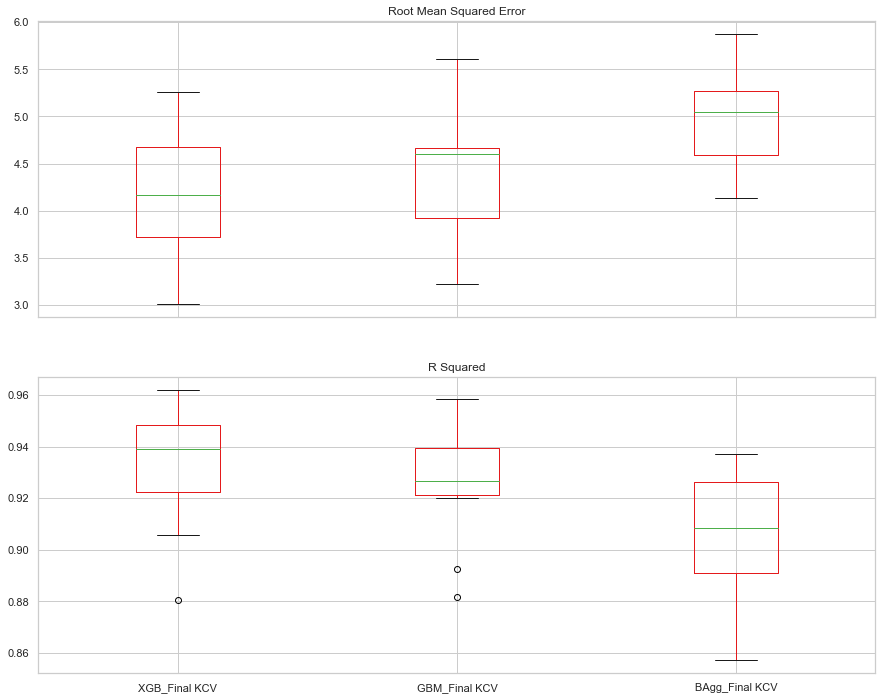

In [102]:
df_CV_R2 = df_CV[df_CV['Metrics'] == 'R2']
df_CV_RMSE = df_CV[df_CV['Metrics'] == 'RMSE']

f, ax = plt.subplots(2, 1, sharex = True, figsize = (15, 12))
df_CV_RMSE.plot(kind='box', ax = ax[0])
ax[0].title.set_text('Root Mean Squared Error')
df_CV_R2.plot(kind='box', ax = ax[1])
ax[1].title.set_text('R Squared')
df_CV_F.set_index('Metrics')

### Summary
#### Model performance range at 95% confidence level is as below
* XGBoost Regressor           𝑅2: 88.33 - 98.27%
* Gradient Boosting Regressor 𝑅2: 87.85 - 97.39%
* Bagging Regressor           𝑅2: 85.79 - 95.51%

Relatively model built using XGBoost Regressor has better performance.